In [1]:
import pandas as pd
import arff
import warnings
warnings.filterwarnings('ignore')

data_freq = arff.load('/Users/ayseljafarova/Desktop/Huk Coburg/freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq , columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge", "DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"] )
data_sev = arff.load('/Users/ayseljafarova/Desktop/Huk Coburg/freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

In [2]:
df_freq.head()

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0      1.0      0.10  'D'       5.0     0.0     55.0        50.0   
1    3.0      1.0      0.77  'D'       5.0     0.0     55.0        50.0   
2    5.0      1.0      0.75  'B'       6.0     2.0     52.0        50.0   
3   10.0      1.0      0.09  'B'       7.0     0.0     46.0        50.0   
4   11.0      1.0      0.84  'B'       7.0     0.0     46.0        50.0   

  VehBrand   VehGas  Density Region  
0    'B12'  Regular   1217.0  'R82'  
1    'B12'  Regular   1217.0  'R82'  
2    'B12'   Diesel     54.0  'R22'  
3    'B12'   Diesel     76.0  'R72'  
4    'B12'   Diesel     76.0  'R72'

In [3]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


In [4]:
df_sev.head()

IDpol  ClaimAmount
0     1552.0       995.20
1  1010996.0      1128.12
2  4024277.0      1851.11
3  4007252.0      1204.00
4  4046424.0      1204.00

In [5]:
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


In [6]:
#Left join we want to keep all policies from freMTPL2freq, even if they have no claims
data = pd.merge(df_freq, df_sev, on='IDpol', how='left')
data.head()

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0      1.0      0.10  'D'       5.0     0.0     55.0        50.0   
1    3.0      1.0      0.77  'D'       5.0     0.0     55.0        50.0   
2    5.0      1.0      0.75  'B'       6.0     2.0     52.0        50.0   
3   10.0      1.0      0.09  'B'       7.0     0.0     46.0        50.0   
4   11.0      1.0      0.84  'B'       7.0     0.0     46.0        50.0   

  VehBrand   VehGas  Density Region  ClaimAmount  
0    'B12'  Regular   1217.0  'R82'          NaN  
1    'B12'  Regular   1217.0  'R82'          NaN  
2    'B12'   Diesel     54.0  'R22'          NaN  
3    'B12'   Diesel     76.0  'R72'          NaN  
4    'B12'   Diesel     76.0  'R72'          NaN

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679513 entries, 0 to 679512
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        679513 non-null  float64
 1   ClaimNb      679513 non-null  float64
 2   Exposure     679513 non-null  float64
 3   Area         679513 non-null  object 
 4   VehPower     679513 non-null  float64
 5   VehAge       679513 non-null  float64
 6   DrivAge      679513 non-null  float64
 7   BonusMalus   679513 non-null  float64
 8   VehBrand     679513 non-null  object 
 9   VehGas       679513 non-null  object 
 10  Density      679513 non-null  float64
 11  Region       679513 non-null  object 
 12  ClaimAmount  26444 non-null   float64
dtypes: float64(9), object(4)
memory usage: 67.4+ MB


In [8]:
data.VehBrand.value_counts()

VehBrand
'B12'    166398
'B1'     163125
'B2'     160179
'B3'      53520
'B5'      34835
'B6'      28611
'B4'      25225
'B10'     17740
'B11'     13623
'B13'     12206
'B14'      4051
Name: count, dtype: int64

In [9]:
data.VehPower.value_counts().sort_index()

VehPower
4.0     115640
5.0     125101
6.0     149305
7.0     145687
8.0      47046
9.0      30147
10.0     31434
11.0     18401
12.0      8231
13.0      3234
14.0      2358
15.0      2929
Name: count, dtype: int64

In [10]:
data.Exposure.value_counts().sort_index()

Exposure
0.002732    1060
0.002740    2045
0.005464     609
0.005479    1397
0.008197     620
            ... 
1.930000       1
1.980000       1
1.990000       1
2.000000       1
2.010000       2
Name: count, Length: 181, dtype: int64

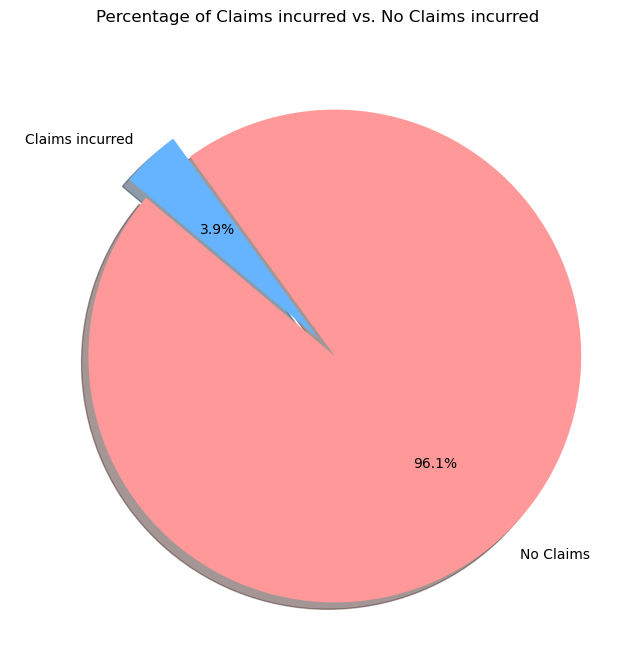

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


null_count = data['ClaimAmount'].isnull().sum()
non_null_count = data['ClaimAmount'].notnull().sum()


labels = ['No Claims', 'Claims incurred']
sizes = [null_count, non_null_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  


plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Claims incurred vs. No Claims incurred')
plt.show()

In [12]:
data["ClaimNb"].value_counts()

ClaimNb
0.0     643953
1.0      32178
2.0       3082
3.0        206
11.0        23
4.0         22
16.0        16
5.0         10
9.0          9
8.0          8
6.0          6
Name: count, dtype: int64

In [13]:
data['IDpol'].unique().shape[0]

678013

In [14]:
data.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount'],
      dtype='object')

In [15]:
# Aggregated the data by 'IDpol'
aggregated_data = data.groupby('IDpol').agg({
    'ClaimAmount': 'sum',
    'ClaimNb': 'count',
    'Exposure': 'sum',
    'Area': 'first',
    'VehPower': 'first',
    'VehAge': 'first',
    'DrivAge': 'first',
    'BonusMalus': 'first',
    'VehBrand': 'first',
    'VehGas': 'first',
    'Density': 'first',
    'Region': 'first'
}).reset_index()

print(aggregated_data.shape)
aggregated_data.head()

(678013, 13)


IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0    1.0          0.0        1      0.10  'D'       5.0     0.0     55.0   
1    3.0          0.0        1      0.77  'D'       5.0     0.0     55.0   
2    5.0          0.0        1      0.75  'B'       6.0     2.0     52.0   
3   10.0          0.0        1      0.09  'B'       7.0     0.0     46.0   
4   11.0          0.0        1      0.84  'B'       7.0     0.0     46.0   

   BonusMalus VehBrand   VehGas  Density Region  
0        50.0    'B12'  Regular   1217.0  'R82'  
1        50.0    'B12'  Regular   1217.0  'R82'  
2        50.0    'B12'   Diesel     54.0  'R22'  
3        50.0    'B12'   Diesel     76.0  'R72'  
4        50.0    'B12'   Diesel     76.0  'R72'

In [16]:
data.IDpol.dtype

dtype('float64')

In [17]:
value_counts = data['IDpol'].value_counts()

ids_to_keep = value_counts[value_counts > 1].index
filtered_data = data[data['IDpol'].isin(ids_to_keep)]
print(data.shape)
print(filtered_data.shape)

ids_larger_than_1 = value_counts[value_counts > 1]
count_ids_larger_than_1 = len(ids_larger_than_1)
print(f"Number of unique 'IDpol' entries that appear more than once: {count_ids_larger_than_1}")
print(f"Number of unique 'IDpol' entries in the data: {data['IDpol'].nunique()}")

(679513, 13)
(2873, 13)
Number of unique 'IDpol' entries that appear more than once: 1373
Number of unique 'IDpol' entries in the data: 678013


In [18]:
data.ClaimNb.value_counts()

ClaimNb
0.0     643953
1.0      32178
2.0       3082
3.0        206
11.0        23
4.0         22
16.0        16
5.0         10
9.0          9
8.0          8
6.0          6
Name: count, dtype: int64

In [19]:
data.IDpol.nunique()

678013

In [20]:
data.head(30)

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0     1.0      1.0      0.10  'D'       5.0     0.0     55.0        50.0   
1     3.0      1.0      0.77  'D'       5.0     0.0     55.0        50.0   
2     5.0      1.0      0.75  'B'       6.0     2.0     52.0        50.0   
3    10.0      1.0      0.09  'B'       7.0     0.0     46.0        50.0   
4    11.0      1.0      0.84  'B'       7.0     0.0     46.0        50.0   
5    13.0      1.0      0.52  'E'       6.0     2.0     38.0        50.0   
6    15.0      1.0      0.45  'E'       6.0     2.0     38.0        50.0   
7    17.0      1.0      0.27  'C'       7.0     0.0     33.0        68.0   
8    18.0      1.0      0.71  'C'       7.0     0.0     33.0        68.0   
9    21.0      1.0      0.15  'B'       7.0     0.0     41.0        50.0   
10   25.0      1.0      0.75  'B'       7.0     0.0     41.0        50.0   
11   27.0      1.0      0.87  'C'       7.0     0.0     56.0        50.0   
12   30.0      1.0      0.81  'D'       4.0     1.0     27.0        90.0   
13   32.0      1.0      0.05  'D'       4.0     0.0     27.0        90.0   
14   35.0      1.0      0.76  'E'       4.0     9.0     23.0       100.0   
15   36.0      1.0      0.34  'F'       9.0     0.0     44.0        76.0   
16   38.0      1.0      0.10  'A'       6.0     2.0     32.0        56.0   
17   42.0      1.0      0.77  'A'       6.0     2.0     32.0        56.0   
18   44.0      1.0      0.74  'A'       6.0     2.0     55.0        50.0   
19   45.0      1.0      0.10  'A'       6.0     2.0     55.0        50.0   
20   47.0      1.0      0.03  'A'       6.0     2.0     55.0        50.0   
21   49.0      2.0      0.81  'E'       7.0     0.0     73.0        50.0   
22   50.0      1.0      0.06  'E'       7.0     0.0     73.0        50.0   
23   52.0      1.0      0.10  'B'       6.0     8.0     27.0        76.0   
24   53.0      1.0      0.55  'D'       5.0     0.0     33.0       100.0   
25   54.0      1.0      0.19  'D'       5.0     0.0     33.0       100.0   
26   55.0      1.0      0.01  'D'       5.0     0.0     33.0       100.0   
27   58.0      1.0      0.03  'C'       5.0     0.0     59.0        50.0   
28   59.0      1.0      0.79  'C'       5.0     0.0     59.0        50.0   
29   60.0      2.0      0.04  'C'       5.0     0.0     59.0        50.0   

   VehBrand   VehGas  Density Region  ClaimAmount  
0     'B12'  Regular   1217.0  'R82'          NaN  
1     'B12'  Regular   1217.0  'R82'          NaN  
2     'B12'   Diesel     54.0  'R22'          NaN  
3     'B12'   Diesel     76.0  'R72'          NaN  
4     'B12'   Diesel     76.0  'R72'          NaN  
5     'B12'  Regular   3003.0  'R31'          NaN  
6     'B12'  Regular   3003.0  'R31'          NaN  
7     'B12'   Diesel    137.0  'R91'          NaN  
8     'B12'   Diesel    137.0  'R91'          NaN  
9     'B12'   Diesel     60.0  'R52'          NaN  
10    'B12'   Diesel     60.0  'R52'          NaN  
11    'B12'   Diesel    173.0  'R93'          NaN  
12    'B12'  Regular    695.0  'R72'          NaN  
13    'B12'  Regular    695.0  'R72'          NaN  
14     'B6'  Regular   7887.0  'R31'          NaN  
15    'B12'  Regular  27000.0  'R11'          NaN  
16    'B12'   Diesel     23.0  'R24'          NaN  
17    'B12'   Diesel     23.0  'R24'          NaN  
18    'B12'  Regular     37.0  'R94'          NaN  
19    'B12'  Regular     37.0  'R94'          NaN  
20    'B12'  Regular     37.0  'R94'          NaN  
21    'B12'  Regular   3317.0  'R93'          NaN  
22    'B12'  Regular   3317.0  'R93'          NaN  
23     'B3'   Diesel     85.0  'R93'          NaN  
24    'B12'  Regular   1746.0  'R11'          NaN  
25    'B12'  Regular   1746.0  'R11'          NaN  
26    'B12'  Regular   1746.0  'R11'          NaN  
27    'B12'  Regular    455.0  'R91'          NaN  
28    'B12'  Regular    455.0  'R91'          NaN  
29    'B12'  Regular    455.0  'R91'          NaN

In [21]:
data.loc[data['IDpol'] == 424.0]

IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
205  424.0      2.0      0.62  'F'      10.0     0.0     51.0       100.0   
206  424.0      2.0      0.62  'F'      10.0     0.0     51.0       100.0   

    VehBrand   VehGas  Density Region  ClaimAmount  
205    'B12'  Regular  27000.0  'R11'       989.64  
206    'B12'  Regular  27000.0  'R11'      9844.36

In [22]:
aggregated_data.loc[aggregated_data['IDpol'] == 2241683.0]

IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  \
321248  2241683.0     35529.37       16      5.28  'D'       4.0    12.0   

        DrivAge  BonusMalus VehBrand   VehGas  Density Region  
321248     52.0        50.0     'B1'  Regular    824.0  'R91'

In [23]:
aggregated_data.loc[(aggregated_data['ClaimNb'] == 1) & (aggregated_data['ClaimAmount'] == 0), 'ClaimNb'] = 0

In [24]:
aggregated_data.loc[(aggregated_data['ClaimNb'] == 0) & (aggregated_data['ClaimAmount'] == 0)]

IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  \
0             1.0          0.0        0   0.10000  'D'       5.0     0.0   
1             3.0          0.0        0   0.77000  'D'       5.0     0.0   
2             5.0          0.0        0   0.75000  'B'       6.0     2.0   
3            10.0          0.0        0   0.09000  'B'       7.0     0.0   
4            11.0          0.0        0   0.84000  'B'       7.0     0.0   
...           ...          ...      ...       ...  ...       ...     ...   
678008  6114326.0          0.0        0   0.00274  'E'       4.0     0.0   
678009  6114327.0          0.0        0   0.00274  'E'       4.0     0.0   
678010  6114328.0          0.0        0   0.00274  'D'       6.0     2.0   
678011  6114329.0          0.0        0   0.00274  'B'       4.0     0.0   
678012  6114330.0          0.0        0   0.00274  'B'       7.0     6.0   

        DrivAge  BonusMalus VehBrand   VehGas  Density Region  
0          55.0        50.0    'B12'  Regular   1217.0  'R82'  
1          55.0        50.0    'B12'  Regular   1217.0  'R82'  
2          52.0        50.0    'B12'   Diesel     54.0  'R22'  
3          46.0        50.0    'B12'   Diesel     76.0  'R72'  
4          46.0        50.0    'B12'   Diesel     76.0  'R72'  
...         ...         ...      ...      ...      ...    ...  
678008     54.0        50.0    'B12'  Regular   3317.0  'R93'  
678009     41.0        95.0    'B12'  Regular   9850.0  'R11'  
678010     45.0        50.0    'B12'   Diesel   1323.0  'R82'  
678011     60.0        50.0    'B12'  Regular     95.0  'R26'  
678012     29.0        54.0    'B12'   Diesel     65.0  'R72'  

[653069 rows x 13 columns]

In [25]:
aggregated_data.loc[(aggregated_data['ClaimNb'] == 1) & (aggregated_data['ClaimAmount'] > 0)]

IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  \
66          139.0       303.00        1      0.75  'F'       7.0     1.0   
93          190.0      1981.84        1      0.14  'B'      12.0     5.0   
199         414.0      1456.55        1      0.14  'E'       4.0     0.0   
223         463.0      3986.67        1      0.31  'A'       5.0     0.0   
287         606.0      1840.14        1      0.84  'D'      10.0     6.0   
...           ...          ...      ...       ...  ...       ...     ...   
676978  6113296.0      1940.40        1      0.17  'E'       4.0     0.0   
677203  6113521.0      1324.40        1      0.18  'C'       4.0     1.0   
677475  6113793.0      1769.88        1      0.14  'C'       7.0     2.0   
677499  6113817.0      1288.28        1      0.17  'D'       4.0     0.0   
677653  6113971.0      1452.00        1      0.13  'D'       7.0    10.0   

        DrivAge  BonusMalus VehBrand   VehGas  Density Region  
66         61.0        50.0    'B12'  Regular  27000.0  'R11'  
93         50.0        60.0    'B12'   Diesel     56.0  'R25'  
199        36.0        85.0    'B12'  Regular   4792.0  'R11'  
223        45.0        50.0    'B12'  Regular     12.0  'R73'  
287        54.0        50.0    'B12'   Diesel    583.0  'R93'  
...         ...         ...      ...      ...      ...    ...  
676978     65.0        50.0    'B12'  Regular   3744.0  'R93'  
677203     26.0        60.0    'B12'   Diesel    311.0  'R82'  
677475     51.0        50.0    'B12'   Diesel    178.0  'R72'  
677499     35.0        51.0    'B12'  Regular   1719.0  'R82'  
677653     39.0        50.0     'B4'  Regular    820.0  'R41'  

[23571 rows x 13 columns]

In [26]:
aggregated_data.ClaimNb.value_counts()

ClaimNb
0     653069
1      23571
2       1298
3         62
4          5
5          2
11         2
6          1
8          1
16         1
9          1
Name: count, dtype: int64

In [27]:
aggregated_data.loc[(aggregated_data['ClaimNb'] >3) & (aggregated_data['ClaimAmount'] > 0)]

IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  \
25347     54009.0      4882.44        4      2.24  'A'       4.0     4.0   
46470     93954.0      6918.10        5      5.00  'E'       7.0     9.0   
304484  2216294.0      9653.60        6      1.98  'D'       4.0    12.0   
320764  2239279.0     24825.77        8      3.28  'D'       4.0    12.0   
321248  2241683.0     35529.37       16      5.28  'D'       4.0    12.0   
321512  2248174.0     18354.66        9      0.72  'D'       4.0    12.0   
344616  2277762.0     28672.00        5      0.40  'D'       4.0    12.0   
364437  3016883.0      4346.87        4      1.08  'E'       5.0     9.0   
487268  3253234.0     25684.42       11      0.88  'D'       4.0    13.0   
488270  3254353.0     17587.78       11      0.77  'D'       4.0    13.0   
501990  4031494.0      5668.81        4      0.40  'E'       4.0     1.0   
642405  6006882.0     18605.42        4      1.96  'E'       6.0     6.0   
655365  6059824.0     10566.22        4      2.28  'D'       5.0     2.0   

        DrivAge  BonusMalus VehBrand   VehGas  Density Region  
25347      46.0        50.0     'B4'   Diesel     29.0  'R24'  
46470      67.0        50.0     'B2'   Diesel   4762.0  'R93'  
304484     52.0        50.0     'B1'  Regular    824.0  'R91'  
320764     52.0        50.0     'B1'  Regular    824.0  'R91'  
321248     52.0        50.0     'B1'  Regular    824.0  'R91'  
321512     52.0        50.0     'B1'  Regular    824.0  'R91'  
344616     52.0        50.0     'B1'  Regular    824.0  'R91'  
364437     23.0        90.0     'B3'   Diesel   6924.0  'R11'  
487268     53.0        50.0     'B1'  Regular    824.0  'R91'  
488270     53.0        50.0     'B1'  Regular    824.0  'R91'  
501990     31.0        85.0    'B12'  Regular   2983.0  'R31'  
642405     53.0        50.0    'B12'  Regular   4762.0  'R93'  
655365     48.0        64.0    'B12'  Regular    682.0  'R93'

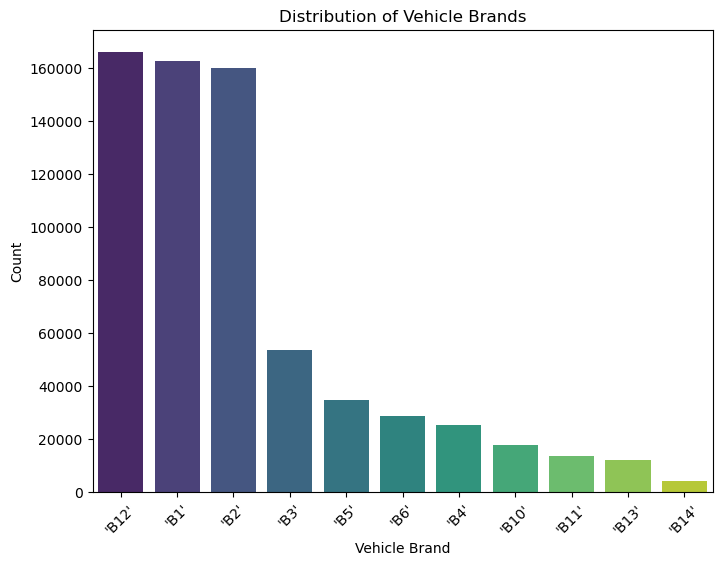

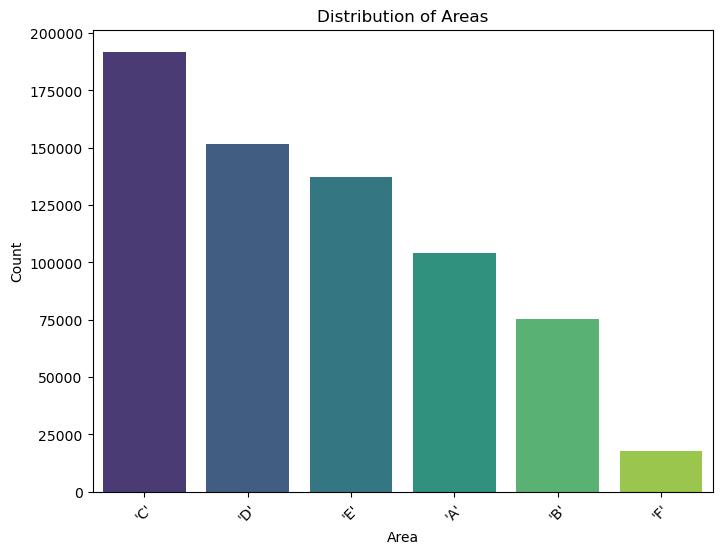

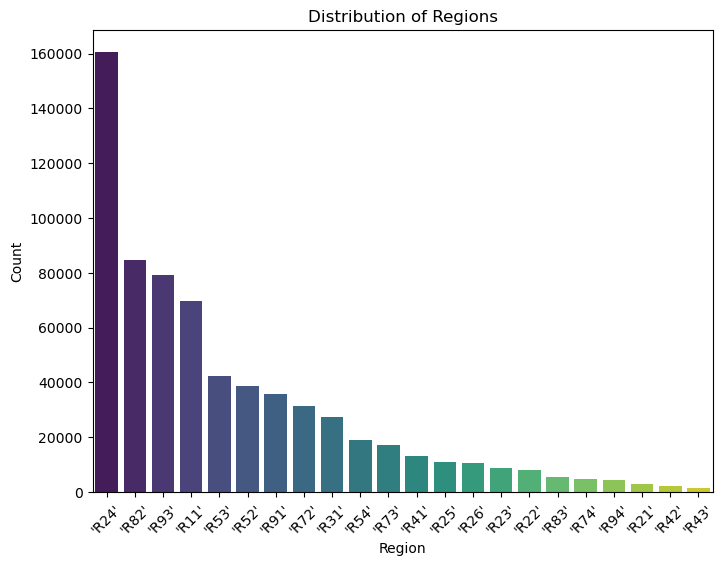

In [28]:
vehbrand_order = aggregated_data['VehBrand'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(x='VehBrand', data=aggregated_data, palette='viridis', order=vehbrand_order)
plt.title('Distribution of Vehicle Brands')
plt.xlabel('Vehicle Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Sort the categories by count in descending order for Area
area_order = aggregated_data['Area'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(x='Area', data=aggregated_data, palette='viridis', order=area_order)
plt.title('Distribution of Areas')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

region_order = aggregated_data['Region'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=aggregated_data, palette='viridis', order=region_order)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

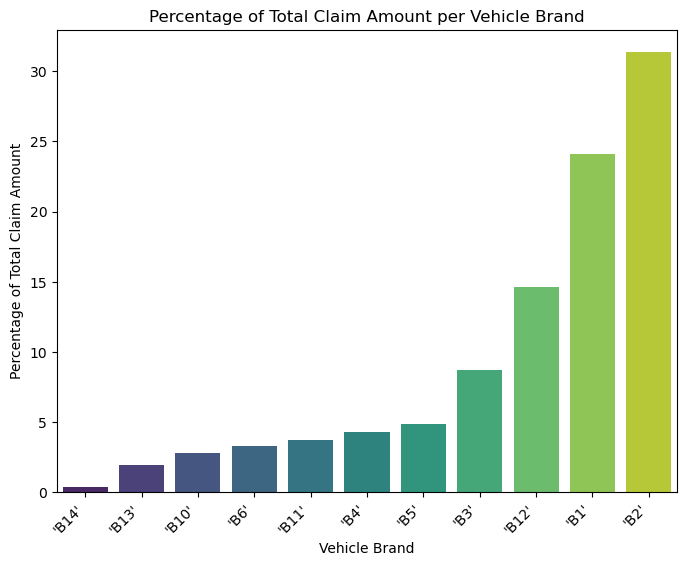

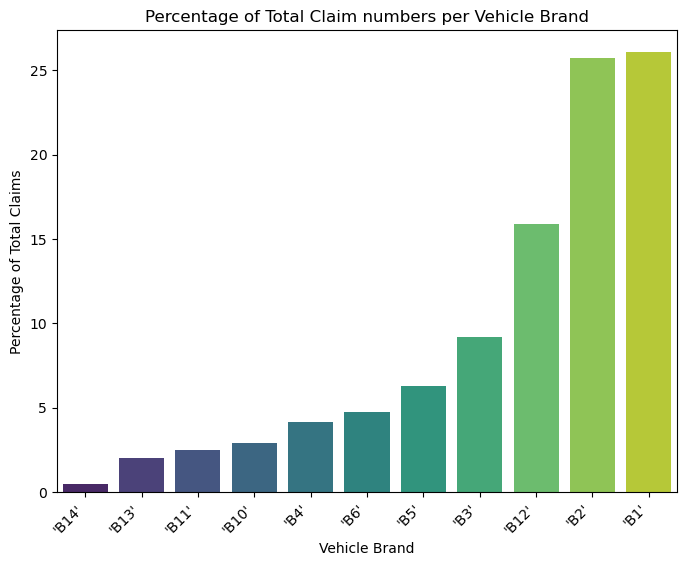

In [29]:
filtered_data = aggregated_data[aggregated_data['ClaimNb'] > 0]

# Group by VehBrand and aggregate the data
brand_claims = filtered_data.groupby('VehBrand').agg(
    total_claim_amount=('ClaimAmount', 'sum'),
    total_claim_nb=('ClaimNb', 'sum')
).reset_index()

# Calculate the total claim amount and percentage
total_claim_amount = brand_claims['total_claim_amount'].sum()
brand_claims['Percentage_ClaimAmount'] = (brand_claims['total_claim_amount'] / total_claim_amount) * 100

# Calculate the total claim number and percentage
total_claim_nb = brand_claims['total_claim_nb'].sum()
brand_claims['Percentage_ClaimNb'] = (brand_claims['total_claim_nb'] / total_claim_nb) * 100

# Sort the data by total claim amount
brand_claims = brand_claims.sort_values(by='total_claim_amount')

# Plot the percentage of total claim amount per vehicle brand
plt.figure(figsize=(8, 6))
sns.barplot(x='VehBrand', y='Percentage_ClaimAmount', data=brand_claims, palette='viridis')
plt.title('Percentage of Total Claim Amount per Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Percentage of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number
brand_claims = brand_claims.sort_values(by='total_claim_nb')

# Plot the percentage of total claims per vehicle brand
plt.figure(figsize=(8, 6))
sns.barplot(x='VehBrand', y='Percentage_ClaimNb', data=brand_claims, palette='viridis')
plt.title('Percentage of Total Claim numbers per Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Percentage of Total Claims')
plt.xticks(rotation=45, ha='right')
plt.show()


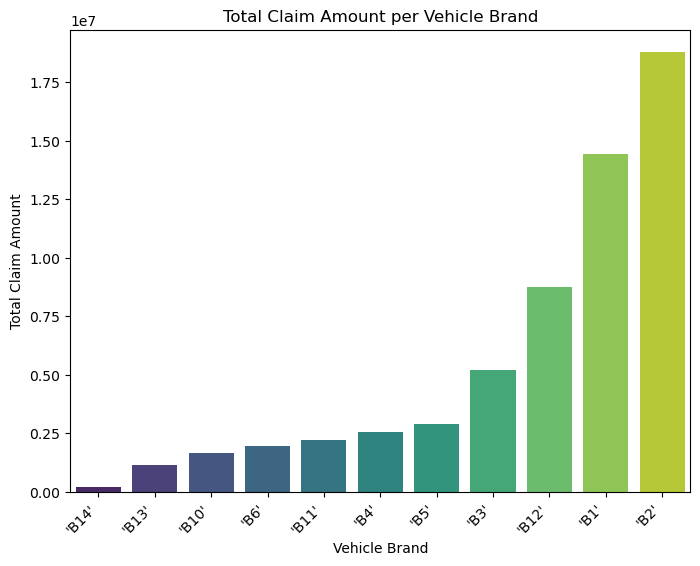

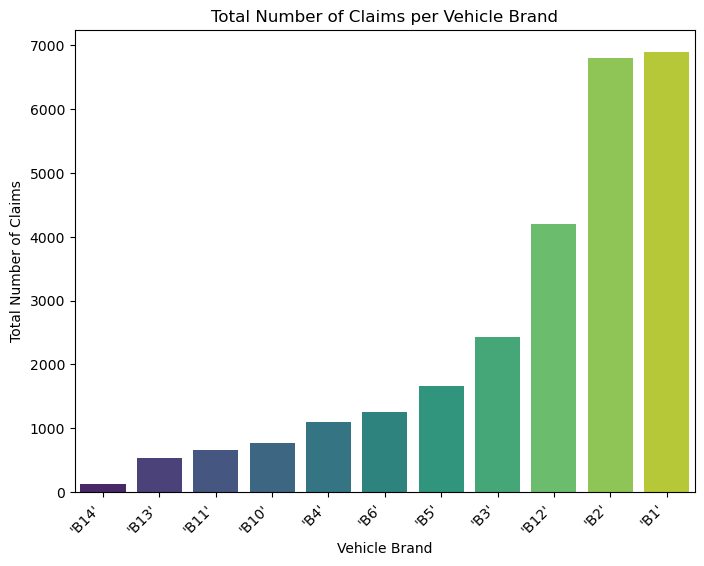

In [30]:
brand_claims = brand_claims.sort_values(by='total_claim_amount', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='VehBrand', y='total_claim_amount', data=brand_claims, palette='viridis')
plt.title('Total Claim Amount per Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number in ascending order
brand_claims = brand_claims.sort_values(by='total_claim_nb', ascending=True)

# Plot the total number of claims per vehicle brand
plt.figure(figsize=(8, 6))
sns.barplot(x='VehBrand', y='total_claim_nb', data=brand_claims, palette='viridis')
plt.title('Total Number of Claims per Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Total Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Log scale 

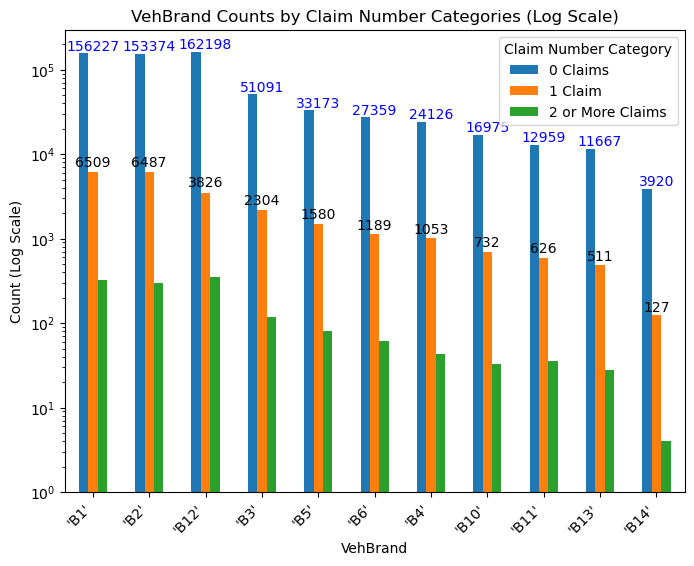

In [31]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

grouped_data = filtered_data.groupby(['ClaimNbCategory', 'VehBrand']).size().reset_index(name='Count')

pivot_data = grouped_data.pivot(index='VehBrand', columns='ClaimNbCategory', values='Count').fillna(0)

pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the pivot_data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

ax = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6), log=True)
plt.title('VehBrand Counts by Claim Number Categories (Log Scale)')
plt.xlabel('VehBrand')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

plt.xticks(rotation=45, ha='right')

for i, total in enumerate(pivot_data['Total Claims']):
    ax.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

for i, value in enumerate(pivot_data['0 Claims']):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='blue', rotation=0)

plt.show()

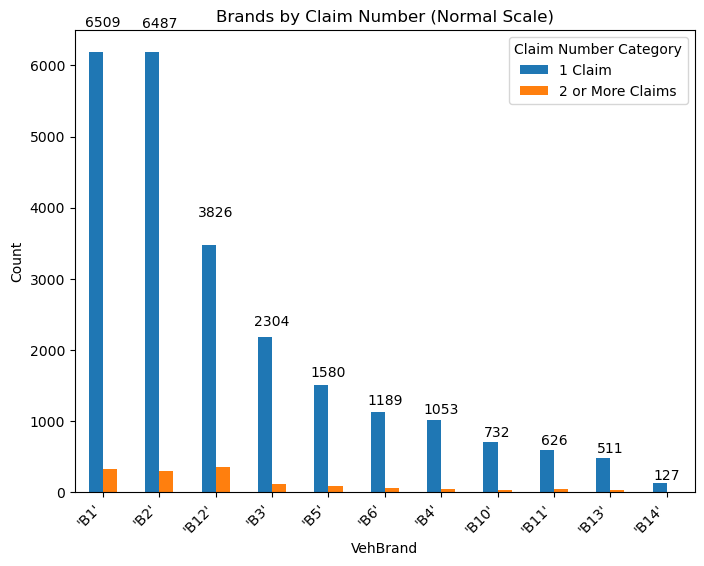

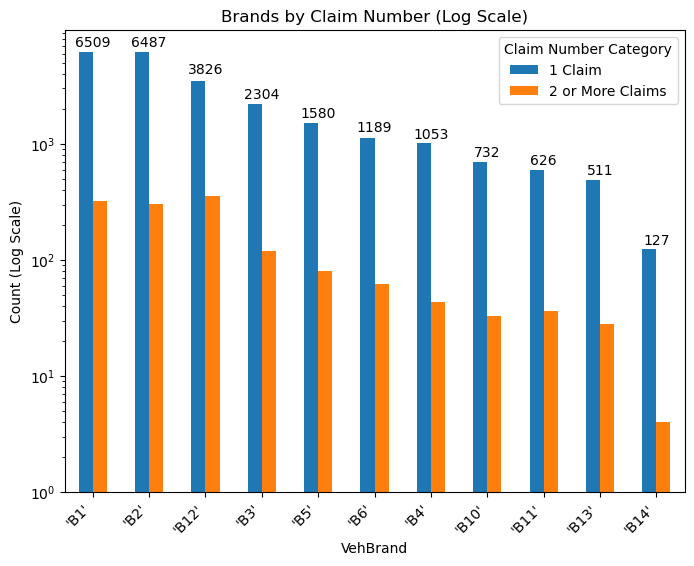

In [32]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and VehBrand
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'VehBrand']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='VehBrand', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per VehBrand
pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

# Plot the results with a normal scale
ax_normal = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6))
plt.title('Brands by Claim Number (Normal Scale)')
plt.xlabel('VehBrand')
plt.ylabel('Count')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each VehBrand
for i, total in enumerate(pivot_data['Total Claims']):
    ax_normal.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

# Plot the results with a logarithmic scale
ax_log = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6), log=True)
plt.title('Brands by Claim Number (Log Scale)')
plt.xlabel('VehBrand')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each VehBrand
for i, total in enumerate(pivot_data['Total Claims']):
    ax_log.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

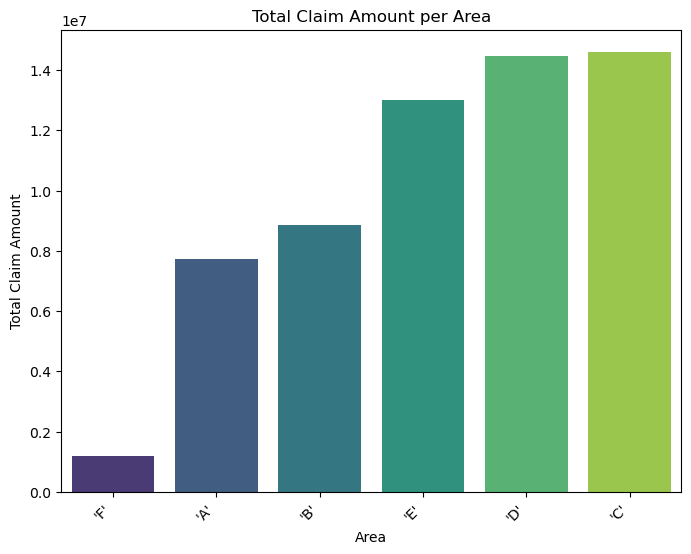

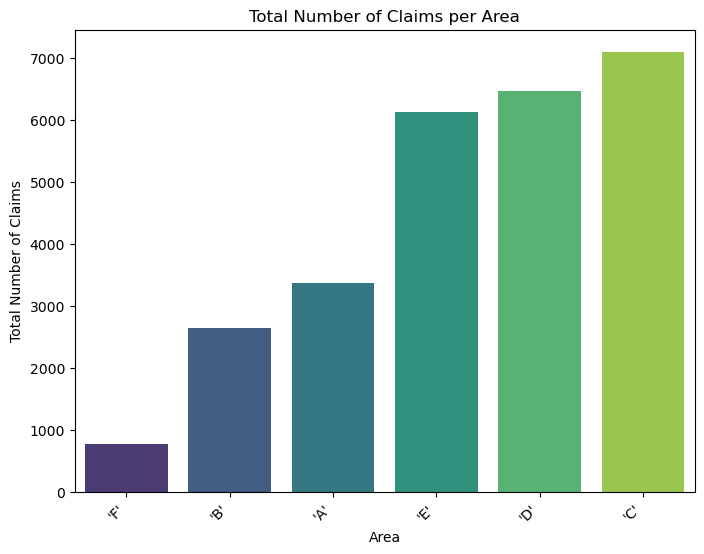

In [33]:
area_claims = filtered_data.groupby('Area').agg(
    total_claim_amount=('ClaimAmount', 'sum'),
    total_claim_nb=('ClaimNb', 'sum')
).reset_index()

# Sort the data by total claim amount
area_claims = area_claims.sort_values(by='total_claim_amount')

# Plot the total claim amount per area with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='total_claim_amount', data=area_claims, palette='viridis')
plt.title('Total Claim Amount per Area')
plt.xlabel('Area')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number
area_claims = area_claims.sort_values(by='total_claim_nb')

# Plot the total number of claims per area with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='total_claim_nb', data=area_claims, palette='viridis')
plt.title('Total Number of Claims per Area')
plt.xlabel('Area')
plt.ylabel('Total Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
area_claims["total_claim_amount"].sum()

59909216.5

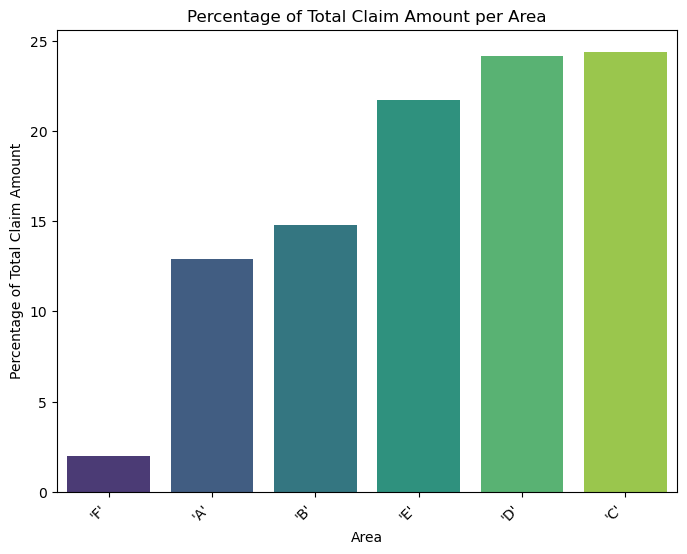

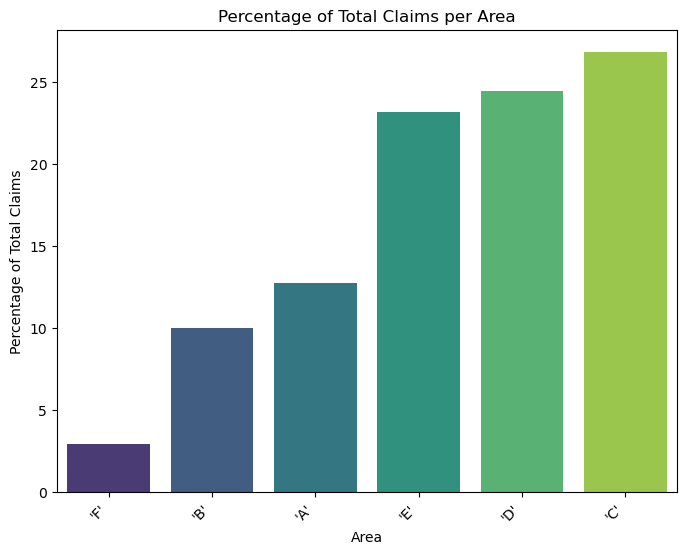

In [35]:
total_claim_amount = area_claims['total_claim_amount'].sum()
area_claims['Percentage_ClaimAmount'] = (area_claims['total_claim_amount'] / total_claim_amount) * 100

# Calculate the total claim number and percentage
total_claim_nb = area_claims['total_claim_nb'].sum()
area_claims['Percentage_ClaimNb'] = (area_claims['total_claim_nb'] / total_claim_nb) * 100

# Sort the data by total claim amount
area_claims = area_claims.sort_values(by='total_claim_amount')

# Plot the percentage of total claim amount per area with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='Percentage_ClaimAmount', data=area_claims, palette='viridis')
plt.title('Percentage of Total Claim Amount per Area')
plt.xlabel('Area')
plt.ylabel('Percentage of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number
area_claims = area_claims.sort_values(by='total_claim_nb')

# Plot the percentage of total claims per area with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='Percentage_ClaimNb', data=area_claims, palette='viridis')
plt.title('Percentage of Total Claims per Area')
plt.xlabel('Area')
plt.ylabel('Percentage of Total Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

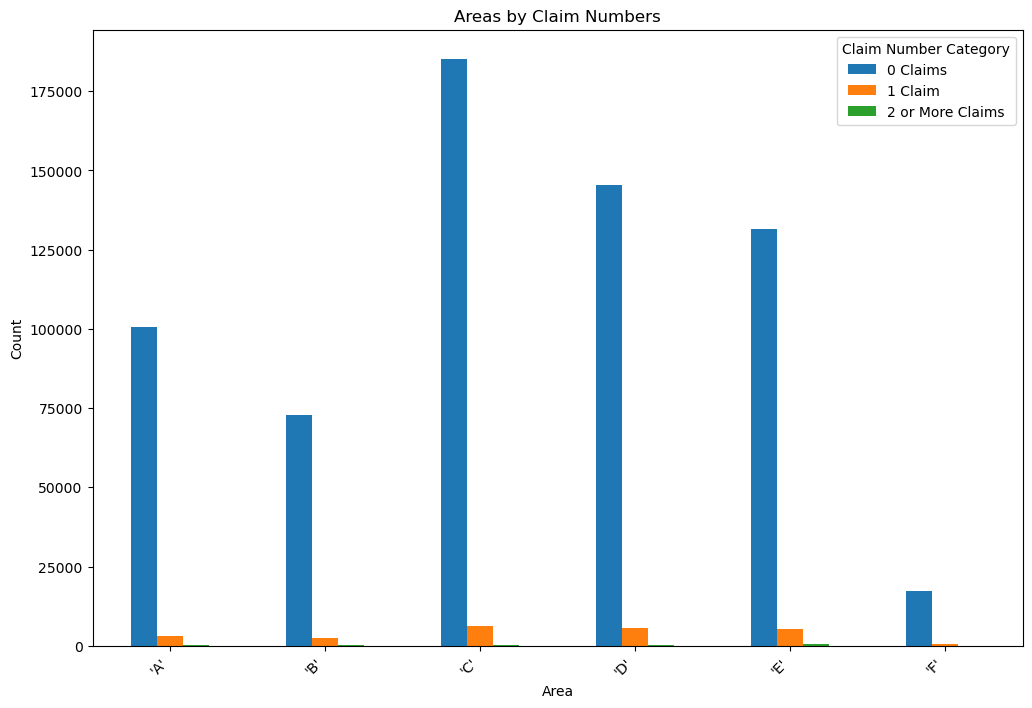

In [36]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    else:
        return '2 or More Claims'


aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)
grouped_data = aggregated_data.groupby(['ClaimNbCategory', 'Area']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot(index='Area', columns='ClaimNbCategory', values='Count').fillna(0)

ax = pivot_data.plot(kind='bar', figsize=(12, 8))
plt.title('Areas by Claim Numbers')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

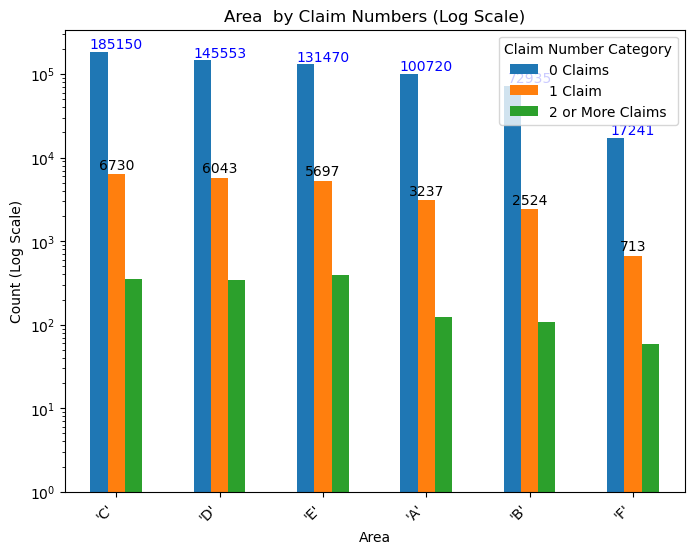

In [37]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

grouped_data = filtered_data.groupby(['ClaimNbCategory', 'Area']).size().reset_index(name='Count')

pivot_data = grouped_data.pivot(index='Area', columns='ClaimNbCategory', values='Count').fillna(0)

pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the pivot_data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

ax = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6), log=True)
plt.title('Area  by Claim Numbers (Log Scale)')
plt.xlabel('Area')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

plt.xticks(rotation=45, ha='right')

for i, total in enumerate(pivot_data['Total Claims']):
    ax.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

# Annotate the values on top of the highest blue bar (0 Claims)
for i, value in enumerate(pivot_data['0 Claims']):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='blue', rotation=0)

plt.show()

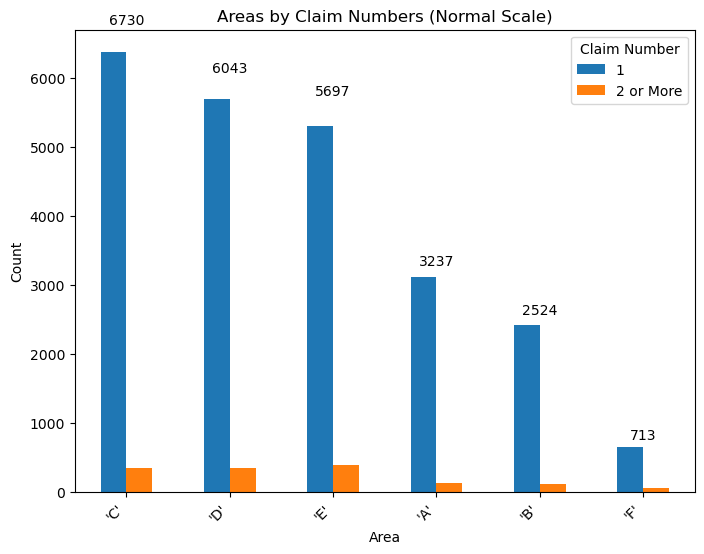

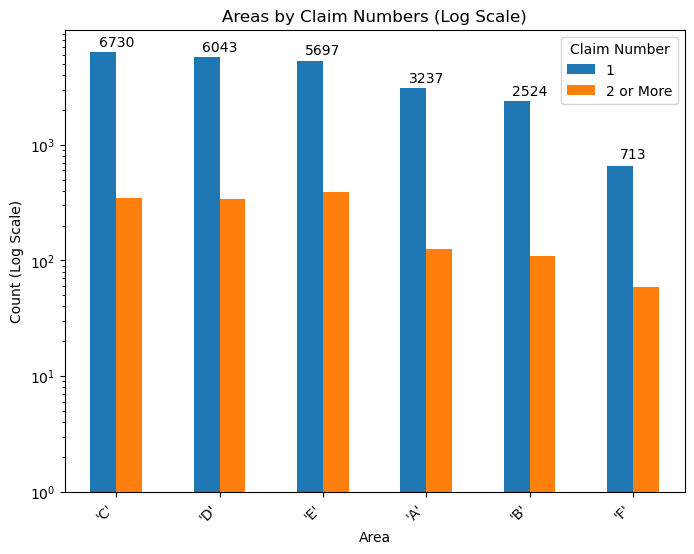

In [38]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 1:
        return '1'
    elif claim_nb >= 2:
        return '2 or More'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and Area
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'Area']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Area', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per Area
pivot_data['Total Claims'] = pivot_data[['1', '2 or More']].sum(axis=1)

# Sort the data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

# Plot the results with a normal scale
ax_normal = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6))
plt.title('Areas by Claim Numbers (Normal Scale)')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Claim Number')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Area
for i, total in enumerate(pivot_data['Total Claims']):
    ax_normal.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

# Plot the results with a logarithmic scale
ax_log = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6), log=True)
plt.title('Areas by Claim Numbers (Log Scale)')
plt.xlabel('Area')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Area
for i, total in enumerate(pivot_data['Total Claims']):
    ax_log.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

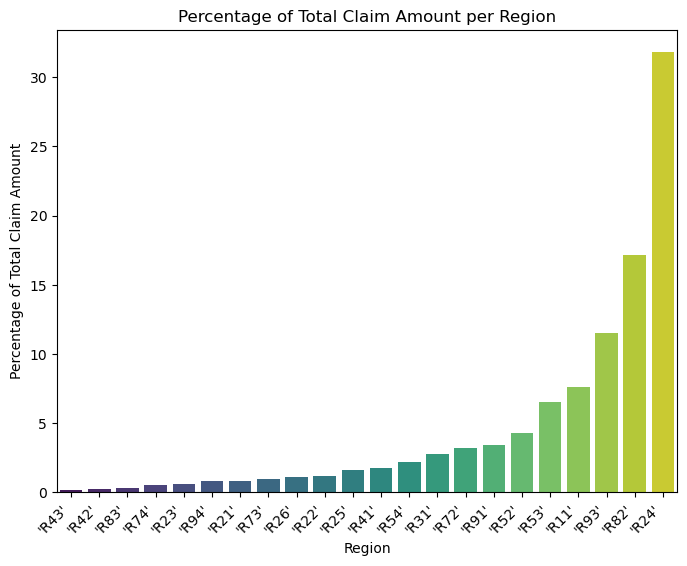

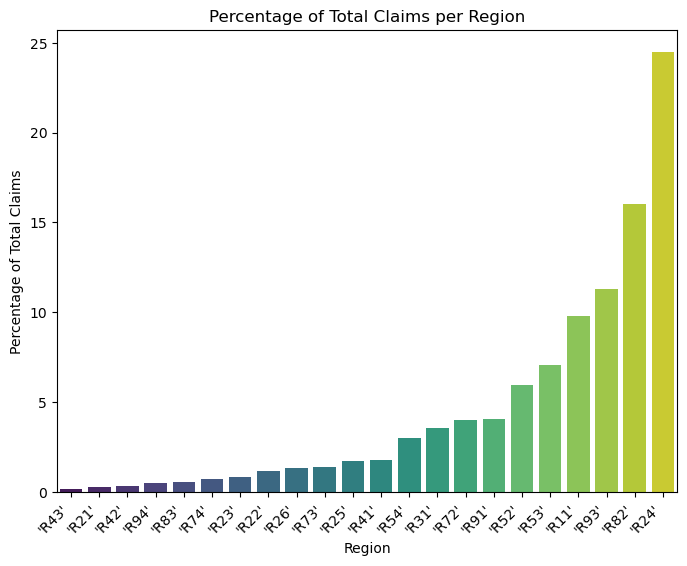

In [39]:
region_claims = filtered_data.groupby('Region').agg(
    total_claim_amount=('ClaimAmount', 'sum'),
    total_claim_nb=('ClaimNb', 'sum')
).reset_index()

# Calculate the total claim amount and percentage
total_claim_amount = region_claims['total_claim_amount'].sum()
region_claims['Percentage_ClaimAmount'] = (region_claims['total_claim_amount'] / total_claim_amount) * 100

# Calculate the total claim number and percentage
total_claim_nb = region_claims['total_claim_nb'].sum()
region_claims['Percentage_ClaimNb'] = (region_claims['total_claim_nb'] / total_claim_nb) * 100

# Sort the data by percentage of total claim amount
region_claims = region_claims.sort_values(by='Percentage_ClaimAmount')

# Plot the percentage of total claim amount per region with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Percentage_ClaimAmount', data=region_claims, palette='viridis')
plt.title('Percentage of Total Claim Amount per Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by percentage of total claim number
region_claims = region_claims.sort_values(by='Percentage_ClaimNb')

# Plot the percentage of total claims per region with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Percentage_ClaimNb', data=region_claims, palette='viridis')
plt.title('Percentage of Total Claims per Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Total Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
region_claims.head()

Region  total_claim_amount  total_claim_nb  Percentage_ClaimAmount  \
10  'R43'            76534.11              38                0.127750   
1   'R21'           481248.34              77                0.803296   
9   'R42'           121424.99              92                0.202682   
21  'R94'           464582.55             132                0.775478   
18  'R83'           183974.83             141                0.307089   

    Percentage_ClaimNb  
10            0.143700  
1             0.291181  
9             0.347905  
21            0.499168  
18            0.533202

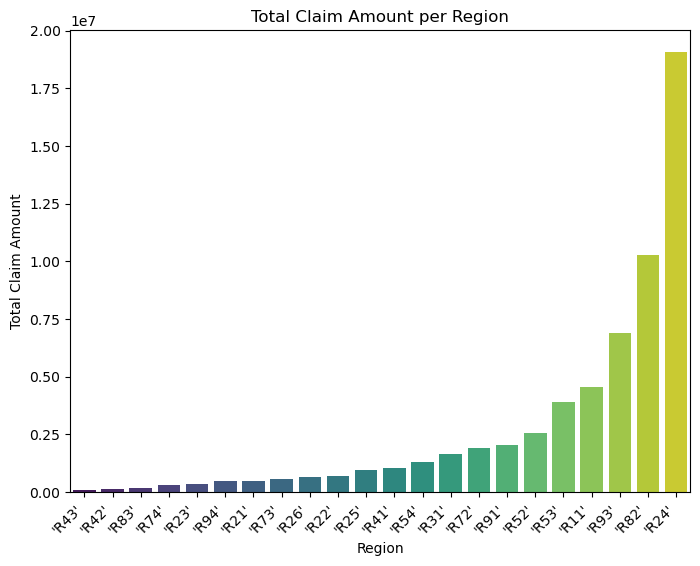

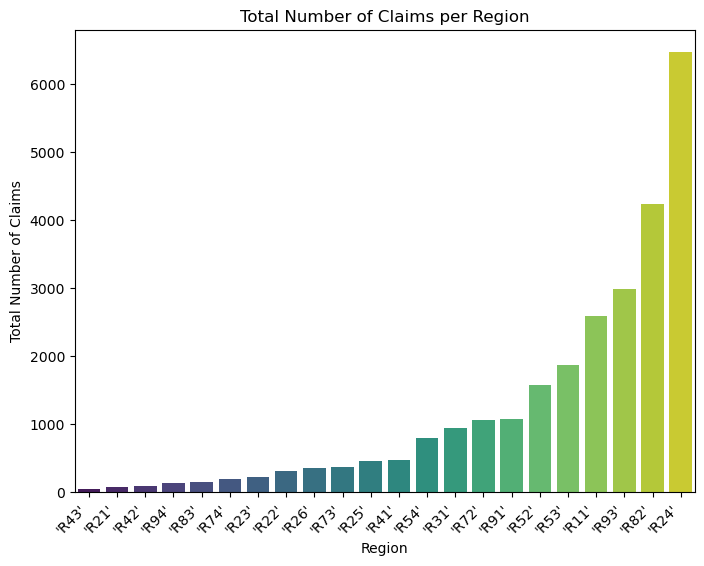

In [41]:
region_claims = region_claims.sort_values(by='total_claim_amount')

# Plot the total claim amount per region with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='total_claim_amount', data=region_claims, palette='viridis')
plt.title('Total Claim Amount per Region')
plt.xlabel('Region')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number
region_claims = region_claims.sort_values(by='total_claim_nb')

# Plot the total number of claims per region with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='total_claim_nb', data=region_claims, palette='viridis')
plt.title('Total Number of Claims per Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

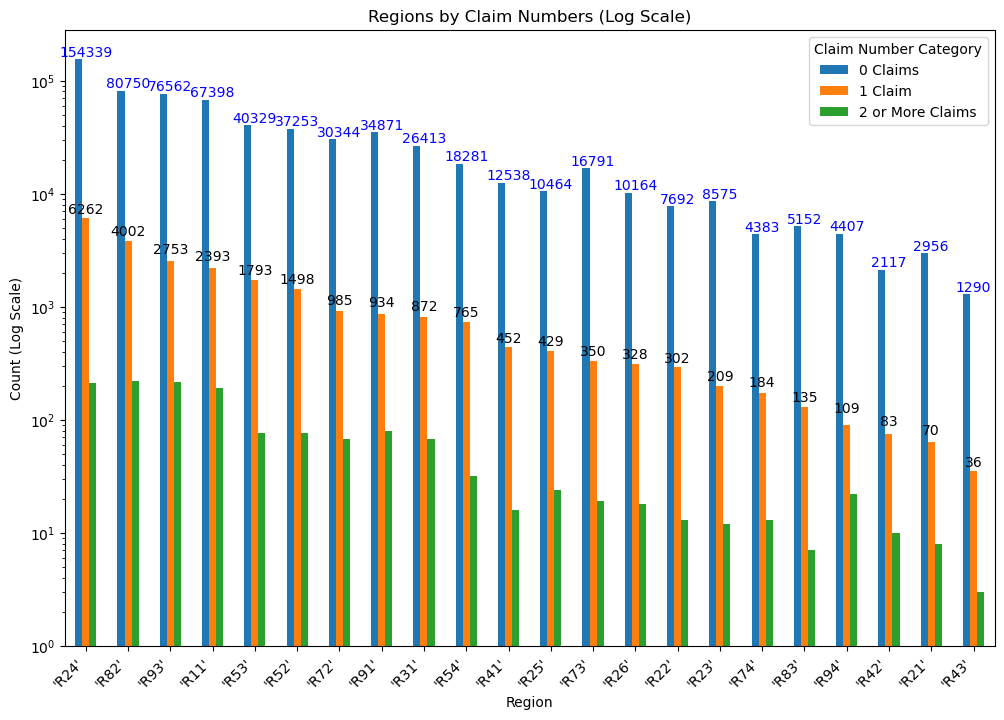

In [42]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and Region
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'Region']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Region', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per Region
pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

# Plot the results with a logarithmic scale
ax = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(12, 8), log=True)
plt.title('Regions by Claim Numbers (Log Scale)')
plt.xlabel('Region')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Region
for i, total in enumerate(pivot_data['Total Claims']):
    ax.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

# Annotate the values on top of the highest blue bar (0 Claims)
for i, value in enumerate(pivot_data['0 Claims']):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='blue', rotation=0)

plt.show()

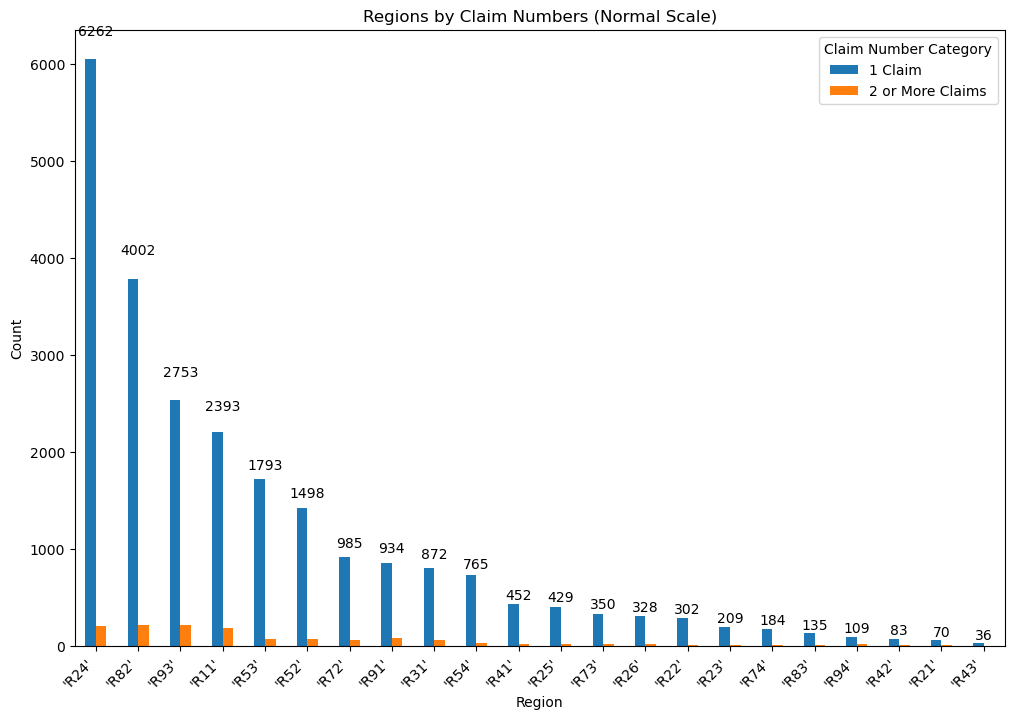

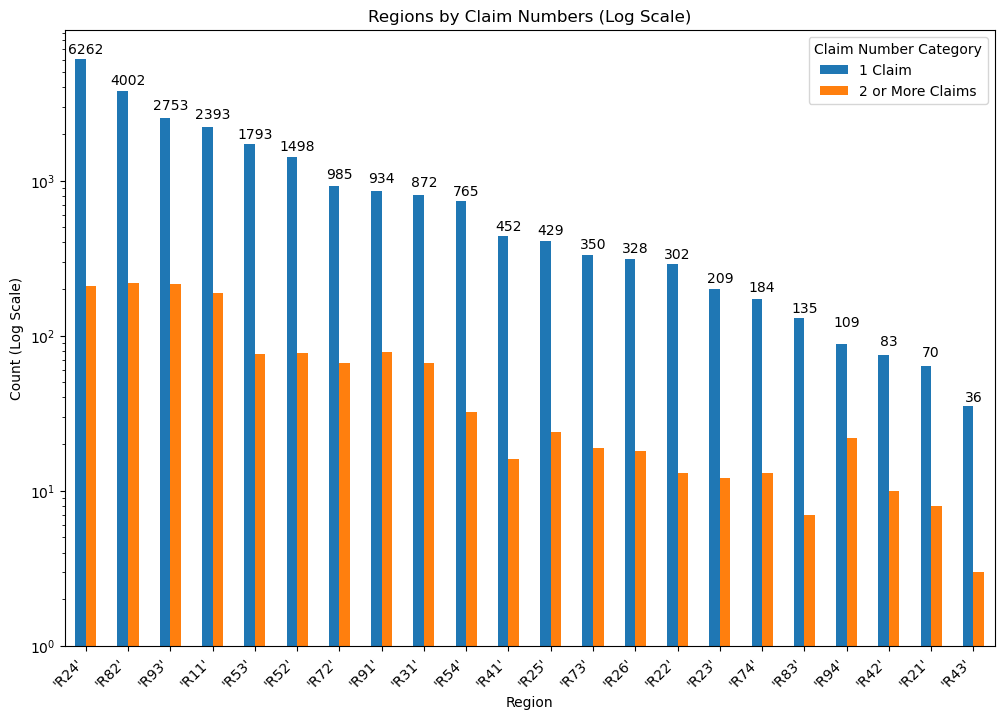

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'aggregated_data'

# Step 1: Create a new column for ClaimNb categories
def categorize_claim_nb(claim_nb):
    if claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and Region
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'Region']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Region', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per Region
pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

# Plot the results with a normal scale
ax_normal = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(12, 8))
plt.title('Regions by Claim Numbers (Normal Scale)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Region
for i, total in enumerate(pivot_data['Total Claims']):
    ax_normal.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

# Plot the results with a logarithmic scale
ax_log = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(12, 8), log=True)
plt.title('Regions by Claim Numbers (Log Scale)')
plt.xlabel('Region')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Region
for i, total in enumerate(pivot_data['Total Claims']):
    ax_log.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

In [44]:
region_claims.head()

Region  total_claim_amount  total_claim_nb  Percentage_ClaimAmount  \
10  'R43'            76534.11              38                0.127750   
1   'R21'           481248.34              77                0.803296   
9   'R42'           121424.99              92                0.202682   
21  'R94'           464582.55             132                0.775478   
18  'R83'           183974.83             141                0.307089   

    Percentage_ClaimNb  
10            0.143700  
1             0.291181  
9             0.347905  
21            0.499168  
18            0.533202

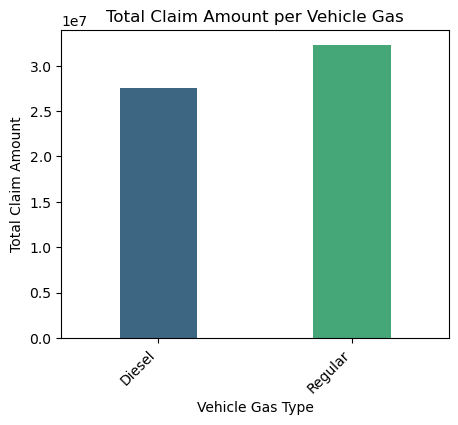

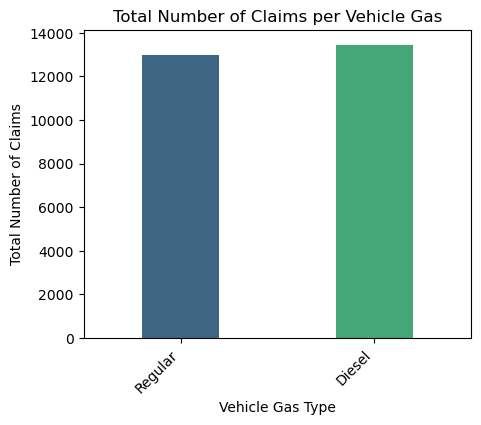

In [45]:
filtered_data = aggregated_data[aggregated_data['ClaimNb'] > 0]
vehgas_claims = filtered_data.groupby('VehGas').agg(
    total_claim_amount=('ClaimAmount', 'sum'),
    total_claim_nb=('ClaimNb', 'sum')
).reset_index()

# Sort by total claim amount
vehgas_claims = vehgas_claims.sort_values(by='total_claim_amount')

# Plot the total claim amount as a bar graph with vertical bars
plt.figure(figsize=(5, 4))
sns.barplot(x='VehGas', y='total_claim_amount', data=vehgas_claims, palette='viridis', width=0.4)
plt.title('Total Claim Amount per Vehicle Gas')
plt.xlabel('Vehicle Gas Type')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort by total claim number
vehgas_claims = vehgas_claims.sort_values(by='total_claim_nb')

# Plot the total count of claims as a bar graph with vertical bars
plt.figure(figsize=(5, 4))
sns.barplot(x='VehGas', y='total_claim_nb', data=vehgas_claims, palette='viridis', width=0.4)
plt.title('Total Number of Claims per Vehicle Gas')
plt.xlabel('Vehicle Gas Type')
plt.ylabel('Total Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

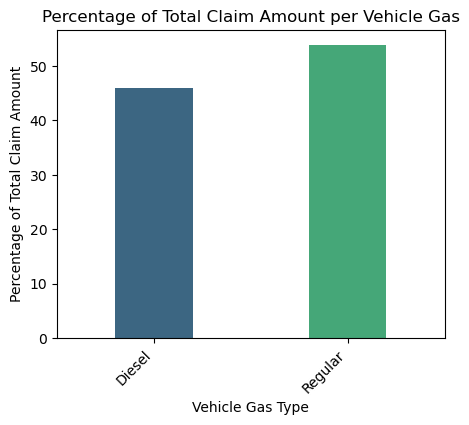

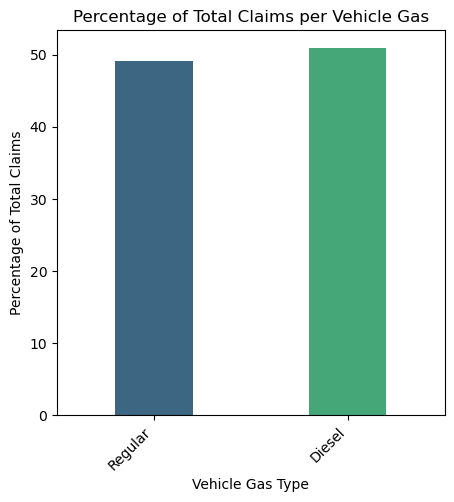

In [46]:
total_claim_amount = vehgas_claims['total_claim_amount'].sum()
vehgas_claims['Percentage_ClaimAmount'] = (vehgas_claims['total_claim_amount'] / total_claim_amount) * 100

# Calculate the total claim number and percentage
total_claim_nb = vehgas_claims['total_claim_nb'].sum()
vehgas_claims['Percentage_ClaimNb'] = (vehgas_claims['total_claim_nb'] / total_claim_nb) * 100

# Sort by percentage of total claim amount
vehgas_claims = vehgas_claims.sort_values(by='Percentage_ClaimAmount')

# Plot the percentage of total claim amount as a bar graph with vertical bars
plt.figure(figsize=(5, 4))
sns.barplot(x='VehGas', y='Percentage_ClaimAmount', data=vehgas_claims, palette='viridis', width=0.4)
plt.title('Percentage of Total Claim Amount per Vehicle Gas')
plt.xlabel('Vehicle Gas Type')
plt.ylabel('Percentage of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort by percentage of total claim number
vehgas_claims = vehgas_claims.sort_values(by='Percentage_ClaimNb')

# Plot the percentage of total claims as a bar graph with vertical bars
plt.figure(figsize=(5, 5))
sns.barplot(x='VehGas', y='Percentage_ClaimNb', data=vehgas_claims, palette='viridis', width=0.4)
plt.title('Percentage of Total Claims per Vehicle Gas')
plt.xlabel('Vehicle Gas Type')
plt.ylabel('Percentage of Total Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

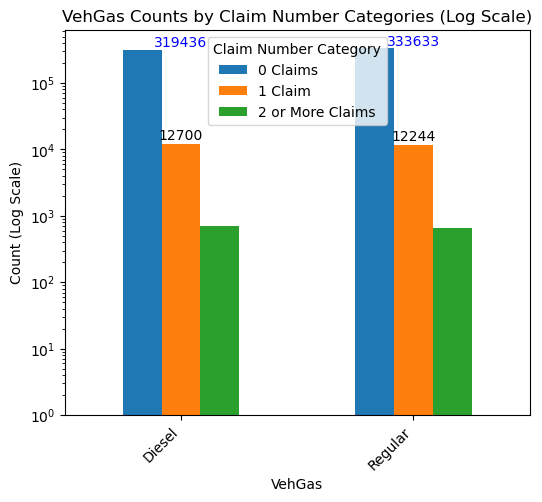

In [47]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and VehGas
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'VehGas']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='VehGas', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per VehGas excluding '0 Claims'
pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Plot the results with a logarithmic scale
ax = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(6, 5), log=True)
plt.title('VehGas Counts by Claim Number Categories (Log Scale)')
plt.xlabel('VehGas')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each VehGas
for i, total in enumerate(pivot_data['Total Claims']):
    ax.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

# Annotate the values on top of the highest blue bar (0 Claims)
for i, value in enumerate(pivot_data['0 Claims']):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='blue', rotation=0)

plt.show()

In [48]:
vehgas_claims.head()

VehGas  total_claim_amount  total_claim_nb  Percentage_ClaimAmount  \
1  Regular         32314542.55           12994               53.939184   
0   Diesel         27594673.95           13450               46.060816   

   Percentage_ClaimNb  
1           49.137801  
0           50.862199

In [49]:
aggregated_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDpol            678013 non-null  float64
 1   ClaimAmount      678013 non-null  float64
 2   ClaimNb          678013 non-null  int64  
 3   Exposure         678013 non-null  float64
 4   Area             678013 non-null  object 
 5   VehPower         678013 non-null  float64
 6   VehAge           678013 non-null  float64
 7   DrivAge          678013 non-null  float64
 8   BonusMalus       678013 non-null  float64
 9   VehBrand         678013 non-null  object 
 10  VehGas           678013 non-null  object 
 11  Density          678013 non-null  float64
 12  Region           678013 non-null  object 
 13  ClaimNbCategory  678013 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 72.4+ MB


In [50]:
aggregated_data.shape

(678013, 14)

In [51]:
numerical_cols = aggregated_data.select_dtypes(include=['float']).columns
numerical_cols = numerical_cols.difference(['IDpol', 'ClaimAmount'])
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 3 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [52]:
aggregated_data.shape

(678013, 14)

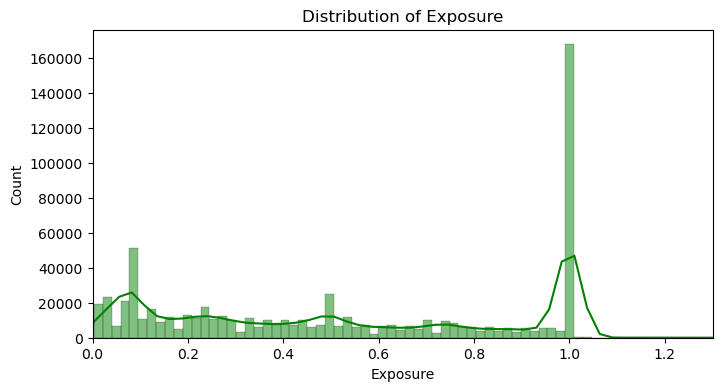

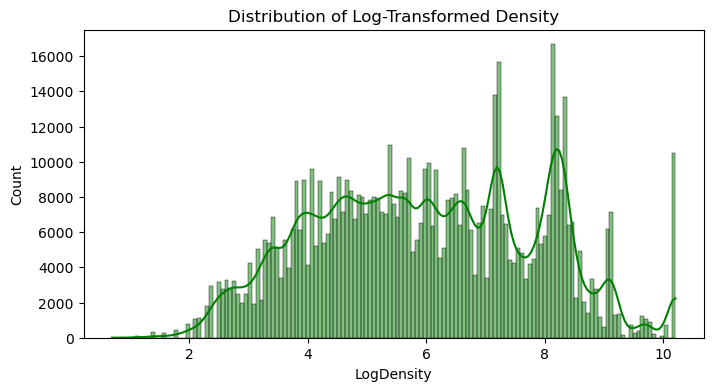

In [53]:
import numpy as np
numerical_columns = ['Exposure', 'Density']

# Apply log transformation to the Density column
aggregated_data['LogDensity'] = np.log(aggregated_data['Density'] + 1)  # Adding 1 to avoid log(0)

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    
    if column == 'Density':
        sns.histplot(data=aggregated_data, x='LogDensity', kde=True, color='green')
        plt.title('Distribution of Log-Transformed Density')
        plt.xlabel('LogDensity')
    else:
        sns.histplot(data=aggregated_data, x=column, kde=True, color='green')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
    
    plt.ylabel('Count')
    
    if column == 'Exposure':
        plt.xlim(0, 1.3)
    
    plt.show()

In [54]:
# Handling outliers differently for each feature as per the discussed strategies.

# 1. Log Transformation for ClaimAmount and Density to reduce skewness
aggregated_data['ClaimAmount'] = aggregated_data['ClaimAmount'].apply(lambda x: np.log1p(x))  # Log(1 + ClaimAmount)

# 2. Remove Exposure outliers (outliers detected earlier using IQR)
Q1_exp = aggregated_data['Exposure'].quantile(0.25)
Q3_exp = aggregated_data['Exposure'].quantile(0.75)
IQR_exp = Q3_exp - Q1_exp
exposure_lower_bound = Q1_exp - 1.5 * IQR_exp
exposure_upper_bound = Q3_exp + 1.5 * IQR_exp
aggregated_data= aggregated_data[(aggregated_data['Exposure'] >= exposure_lower_bound) & (aggregated_data['Exposure'] <= exposure_upper_bound)]

# 3. Capping for VehPower, VehAge, DrivAge, and BonusMalus
capping_dict = {
    'VehPower': 0.99,
    'VehAge': 0.99,
    'DrivAge': 0.99,
    'BonusMalus': 0.99
}

for column, percentile in capping_dict.items():
    upper_cap = aggregated_data[column].quantile(percentile)
    aggregated_data[column] = aggregated_data[column].apply(lambda x: min(x, upper_cap))

# Keep ClaimNb outliers, but can flag them for further analysis if necessary

# Display updated data info after handling outliers
aggregated_data.info(), aggregated_data[['ClaimAmount']].describe()


<class 'pandas.core.frame.DataFrame'>
Index: 677979 entries, 0 to 678012
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDpol            677979 non-null  float64
 1   ClaimAmount      677979 non-null  float64
 2   ClaimNb          677979 non-null  int64  
 3   Exposure         677979 non-null  float64
 4   Area             677979 non-null  object 
 5   VehPower         677979 non-null  float64
 6   VehAge           677979 non-null  float64
 7   DrivAge          677979 non-null  float64
 8   BonusMalus       677979 non-null  float64
 9   VehBrand         677979 non-null  object 
 10  VehGas           677979 non-null  object 
 11  Density          677979 non-null  float64
 12  Region           677979 non-null  object 
 13  ClaimNbCategory  677979 non-null  object 
 14  LogDensity       677979 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 82.8+ MB


(None,
          ClaimAmount
 count  677979.000000
 mean        0.253356
 std         1.315281
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max        15.220480)

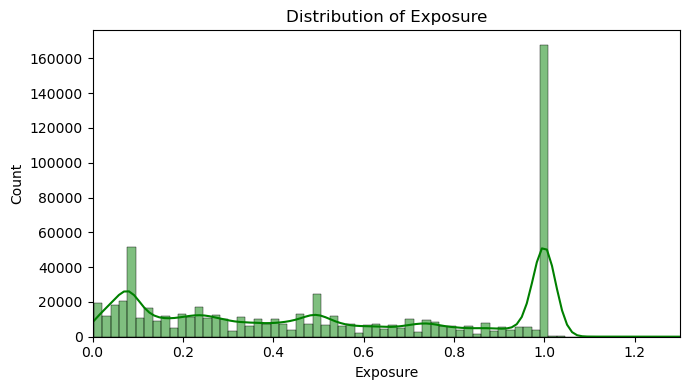

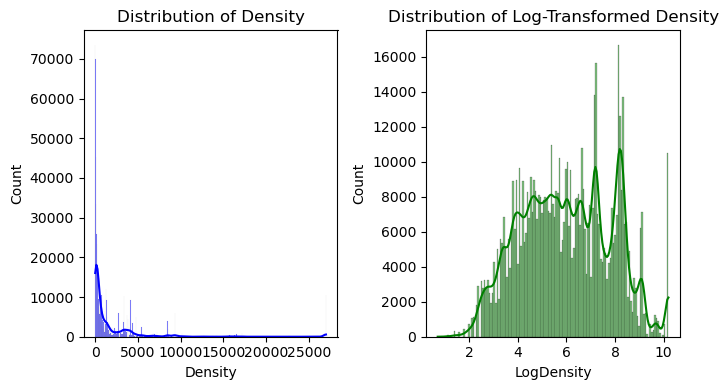

In [55]:
numerical_columns = ['Exposure', 'Density']

# Apply log transformation to the Density column
aggregated_data['LogDensity'] = np.log(aggregated_data['Density'] + 1)  # Adding 1 to avoid log(0)

for column in numerical_columns:
    plt.figure(figsize=(7, 4))
    
    if column == 'Density':
        # Plot the normal Density
        plt.subplot(1, 2, 1)
        sns.histplot(data=aggregated_data, x=column, kde=True, color='blue')
        plt.title('Distribution of Density')
        plt.xlabel('Density')
        plt.ylabel('Count')
        
        # Plot the log-transformed Density
        plt.subplot(1, 2, 2)
        sns.histplot(data=aggregated_data, x='LogDensity', kde=True, color='green')
        plt.title('Distribution of Log-Transformed Density')
        plt.xlabel('LogDensity')
        plt.ylabel('Count')
    else:
        sns.histplot(data=aggregated_data, x=column, kde=True, color='green')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        if column == 'Exposure':
            plt.xlim(0, 1.3)
    
    plt.tight_layout()
    plt.show()

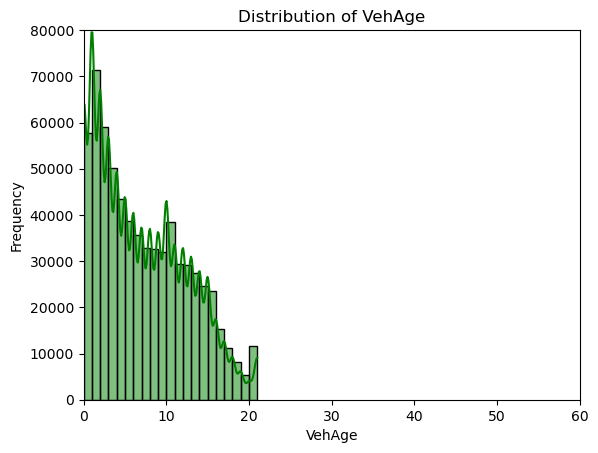

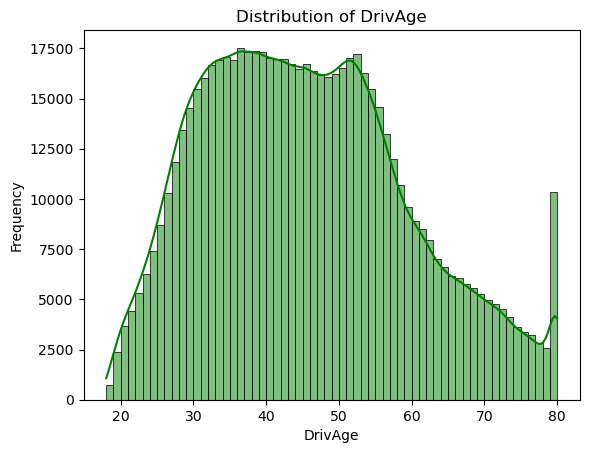

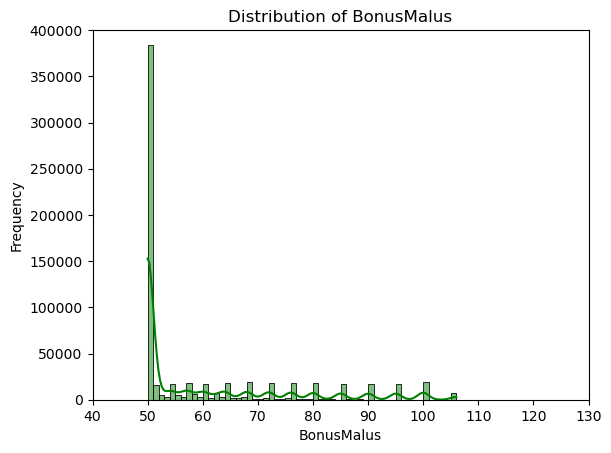

In [56]:
numerical_columns = ['VehAge', 'DrivAge', 'BonusMalus']

for column in numerical_columns:
    sns.histplot(data=aggregated_data, x=column, kde=True, color='green', binwidth=1)  # Adjust binwidth as needed
   

    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
        
    if column == 'VehAge':
        plt.xlim(0, 60)
        plt.ylim(0, 80000)
    
    if column == 'BonusMalus':
        plt.xlim(40, 130)
        plt.ylim(0, 400000)
    
    plt.show()



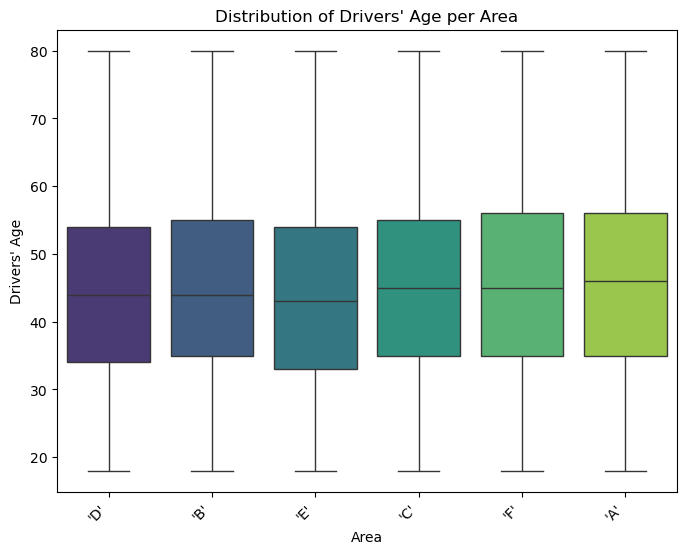

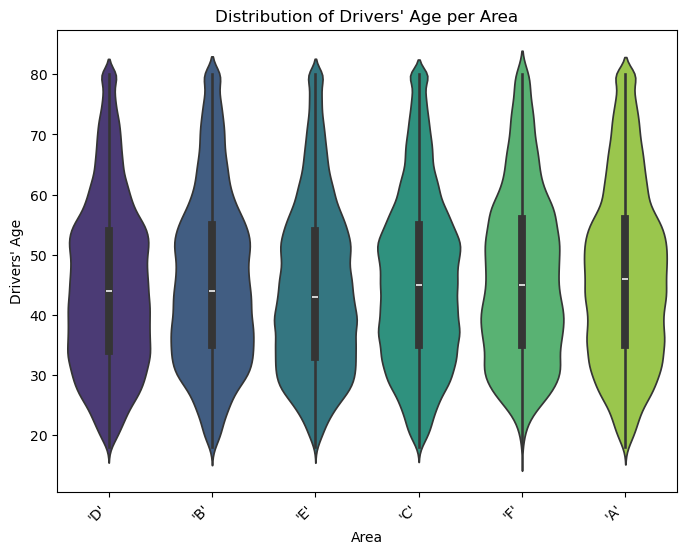

In [57]:
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(data=aggregated_data, x='Area', y='DrivAge', palette='viridis')
plt.title('Distribution of Drivers\' Age per Area')
plt.xlabel('Area')
plt.ylabel('Drivers\' Age')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(data=aggregated_data, x='Area', y='DrivAge', palette='viridis')
plt.title('Distribution of Drivers\' Age per Area')
plt.xlabel('Area')
plt.ylabel('Drivers\' Age')
plt.xticks(rotation=45, ha='right')
plt.show()

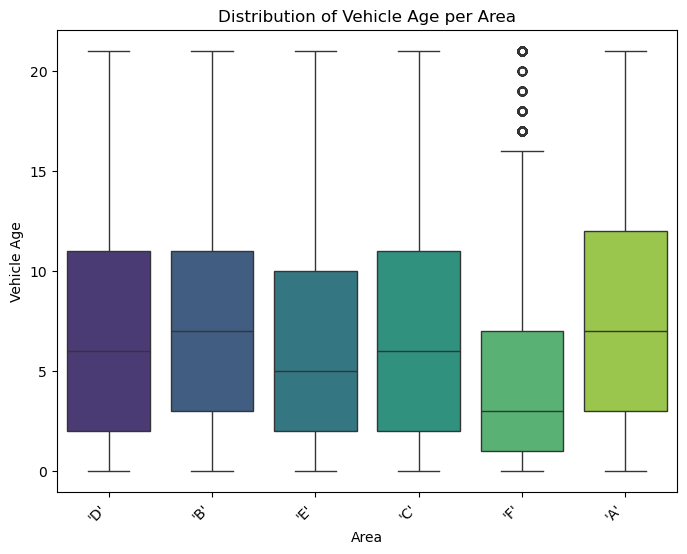

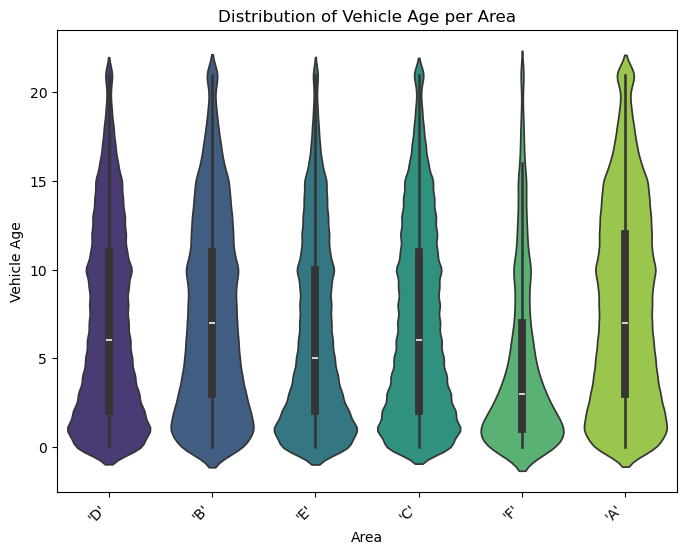

In [58]:
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(data=aggregated_data, x='Area', y='VehAge', palette='viridis')
plt.title('Distribution of Vehicle Age per Area')
plt.xlabel('Area')
plt.ylabel('Vehicle Age')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(data=aggregated_data, x='Area', y='VehAge', palette='viridis')
plt.title('Distribution of Vehicle Age per Area')
plt.xlabel('Area')
plt.ylabel('Vehicle Age')
plt.xticks(rotation=45, ha='right')
plt.show()

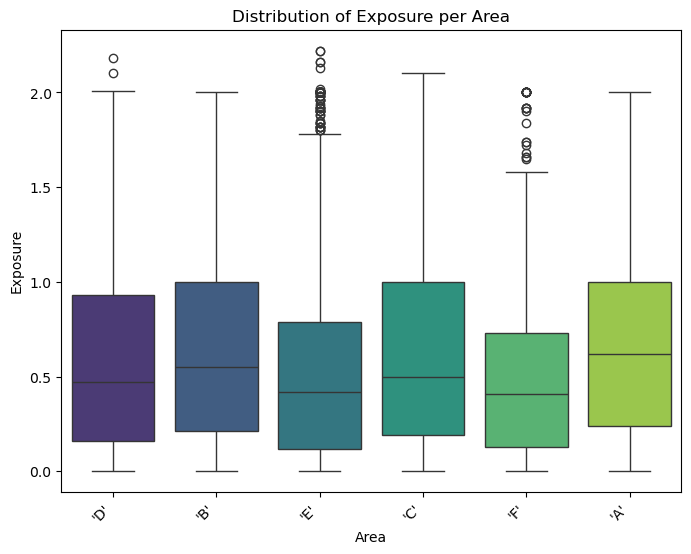

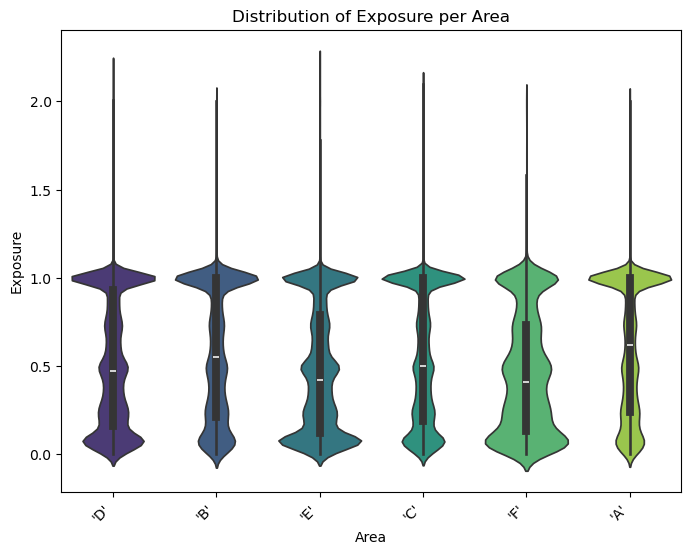

In [59]:
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(data=aggregated_data, x='Area', y='Exposure', palette='viridis')
plt.title('Distribution of Exposure per Area')
plt.xlabel('Area')
plt.ylabel('Exposure')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(data=aggregated_data, x='Area', y='Exposure', palette='viridis')
plt.title('Distribution of Exposure per Area')
plt.xlabel('Area')
plt.ylabel('Exposure')
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
aggregated_data.Exposure.value_counts().sort_index()

Exposure
0.002732    1060
0.002740    2045
0.005464     609
0.005479    1395
0.008197     620
            ... 
2.100000       2
2.130000       1
2.160000       2
2.180000       1
2.220000       2
Name: count, Length: 209, dtype: int64

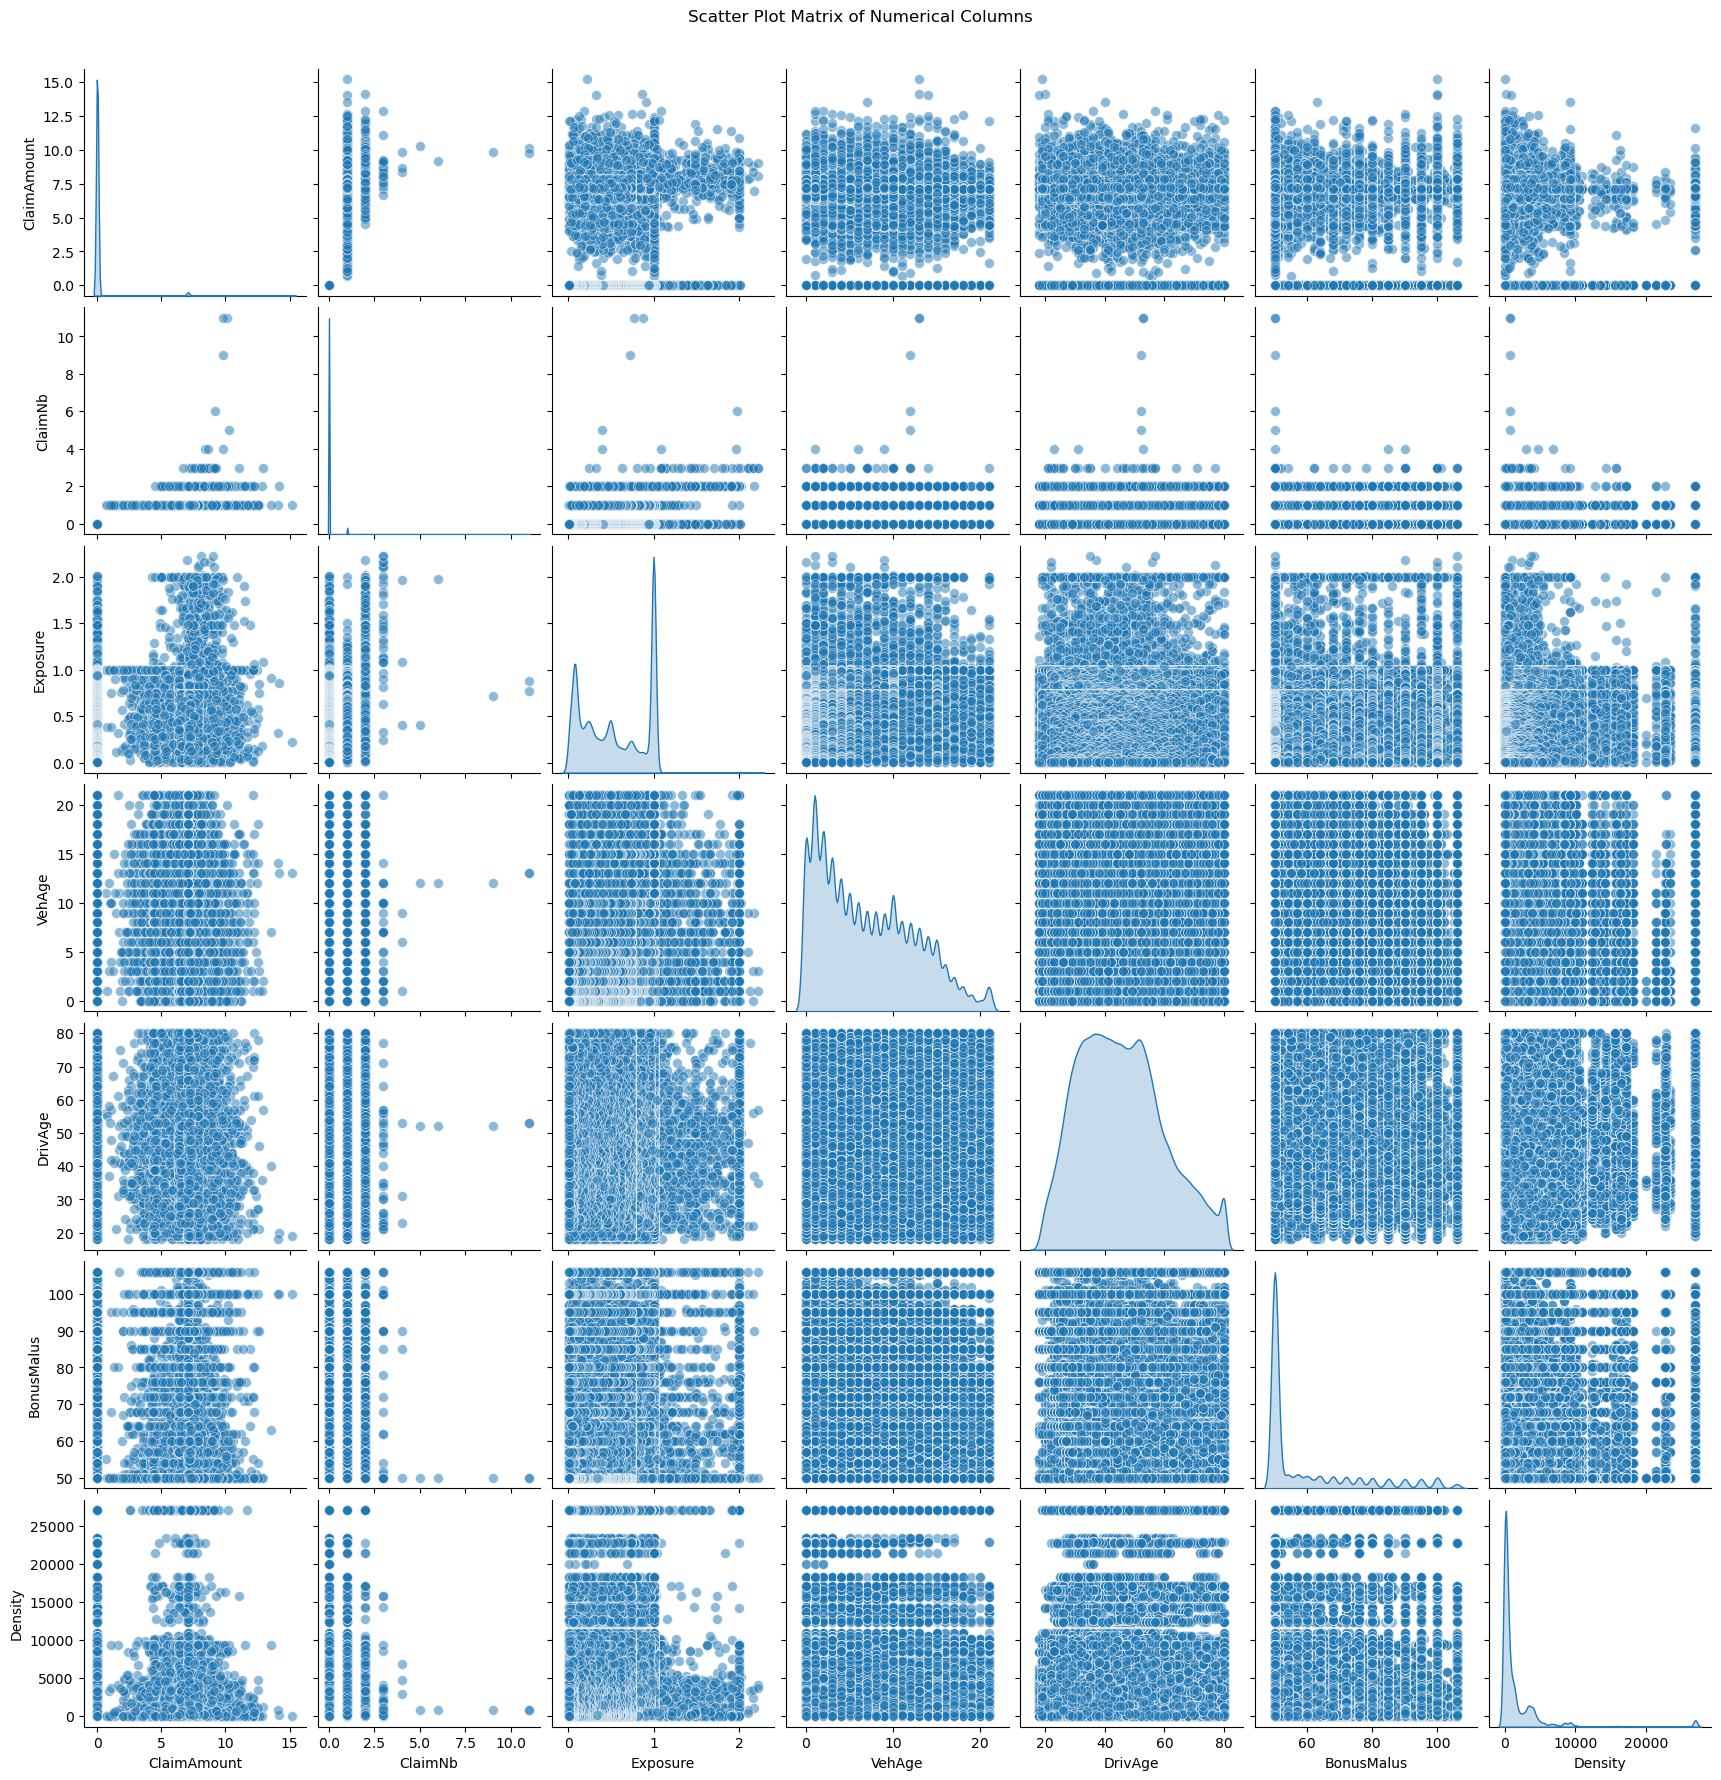

In [61]:
numerical_columns = ['ClaimAmount', 'ClaimNb', 'Exposure', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']
sns.pairplot(aggregated_data[numerical_columns], diag_kind='kde', plot_kws={'alpha':0.5, 's':50})
plt.suptitle('Scatter Plot Matrix of Numerical Columns', y=1.02)
plt.show()

In [62]:
print(aggregated_data.isna().sum())

IDpol              0
ClaimAmount        0
ClaimNb            0
Exposure           0
Area               0
VehPower           0
VehAge             0
DrivAge            0
BonusMalus         0
VehBrand           0
VehGas             0
Density            0
Region             0
ClaimNbCategory    0
LogDensity         0
dtype: int64


In [63]:
aggregated_data['AvgClaimAmountPerExposure'] = aggregated_data['ClaimAmount'] / aggregated_data['Exposure']
aggregated_data['AvgClaimAmountPerExposure'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

In [64]:
aggregated_data['Target'] = np.where(aggregated_data['ClaimAmount'] > 0, 1, 0)
print(aggregated_data['Target'].value_counts(normalize=True)*100)
print(aggregated_data.head())

Target
0    96.325845
1     3.674155
Name: proportion, dtype: float64
   IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0    1.0          0.0        0      0.10  'D'       5.0     0.0     55.0   
1    3.0          0.0        0      0.77  'D'       5.0     0.0     55.0   
2    5.0          0.0        0      0.75  'B'       6.0     2.0     52.0   
3   10.0          0.0        0      0.09  'B'       7.0     0.0     46.0   
4   11.0          0.0        0      0.84  'B'       7.0     0.0     46.0   

   BonusMalus VehBrand   VehGas  Density Region ClaimNbCategory  LogDensity  \
0        50.0    'B12'  Regular   1217.0  'R82'        0 Claims    7.104965   
1        50.0    'B12'  Regular   1217.0  'R82'        0 Claims    7.104965   
2        50.0    'B12'   Diesel     54.0  'R22'        0 Claims    4.007333   
3        50.0    'B12'   Diesel     76.0  'R72'        0 Claims    4.343805   
4        50.0    'B12'   Diesel     76.0  'R72'        0 Claims    4.343805   

#### New features

In [65]:
aggregated_data['VehPower_VehAge'] = aggregated_data['VehPower'] * aggregated_data['VehAge']
print(aggregated_data[['VehPower', 'VehAge', 'VehPower_VehAge']].head())

   VehPower  VehAge  VehPower_VehAge
0       5.0     0.0              0.0
1       5.0     0.0              0.0
2       6.0     2.0             12.0
3       7.0     0.0              0.0
4       7.0     0.0              0.0


In [66]:
# Generatin the new feature 'DrivAge_BonusMalus'
aggregated_data['DrivAge_BonusMalus'] = aggregated_data['DrivAge'] * aggregated_data['BonusMalus']
print(aggregated_data[['DrivAge', 'BonusMalus', 'DrivAge_BonusMalus']].head())

   DrivAge  BonusMalus  DrivAge_BonusMalus
0     55.0        50.0              2750.0
1     55.0        50.0              2750.0
2     52.0        50.0              2600.0
3     46.0        50.0              2300.0
4     46.0        50.0              2300.0


In [67]:
def calculate_woe(df, feature, target):
    df_woe = df.groupby(feature)[target].agg(['count', 'sum'])
    df_woe.columns = ['Total', 'Bad']
    df_woe['Good'] = df_woe['Total'] - df_woe['Bad']
    df_woe['Bad Rate'] = df_woe['Bad'] / df_woe['Bad'].sum()
    df_woe['Good Rate'] = df_woe['Good'] / df_woe['Good'].sum()
    df_woe['WoE'] = np.log(df_woe['Good Rate'] / df_woe['Bad Rate'])
    return df_woe

# Example usage
woe_df_5 = calculate_woe(aggregated_data, 'DrivAge', 'Target')
woe_df_5

Total  Bad  Good  Bad Rate  Good Rate       WoE
DrivAge                                                 
18.0       748   60   688  0.002409   0.001053 -0.826969
19.0      2392  223  2169  0.008952   0.003321 -0.991564
20.0      3676  294  3382  0.011802   0.005179 -0.823771
21.0      4436  288  4148  0.011562   0.006352 -0.598992
22.0      5290  305  4985  0.012244   0.007633 -0.472537
...        ...  ...   ...       ...        ...       ...
76.0      3232  129  3103  0.005179   0.004751 -0.086101
77.0      2811  101  2710  0.004055   0.004150  0.023170
78.0      2569  102  2467  0.004095   0.003778 -0.080628
79.0      2225  104  2121  0.004175   0.003248 -0.251161
80.0      8104  356  7748  0.014291   0.011864 -0.186154

[63 rows x 6 columns]

In [68]:
woe_df_4 = calculate_woe(aggregated_data, 'VehAge', 'Target')
woe_df_4

Total   Bad   Good  Bad Rate  Good Rate       WoE
VehAge                                                   
0.0     57738  1106  56632  0.044400   0.086717  0.669411
1.0     71280  2168  69112  0.087033   0.105826  0.195510
2.0     59119  2077  57042  0.083380   0.087345  0.046450
3.0     50261  1767  48494  0.070935   0.074256  0.045743
4.0     43489  1682  41807  0.067523   0.064016 -0.053333
5.0     38734  1581  37153  0.063468   0.056890 -0.109426
6.0     35714  1572  34142  0.063107   0.052279 -0.188234
7.0     32876  1553  31323  0.062344   0.047963 -0.262249
8.0     32678  1428  31250  0.057326   0.047851 -0.180669
9.0     31921  1462  30459  0.058691   0.046640 -0.229837
10.0    38393  1550  36843  0.062224   0.056415 -0.098003
11.0    29430  1336  28094  0.053633   0.043018 -0.220538
12.0    29060  1281  27779  0.051425   0.042536 -0.189774
13.0    27352  1028  26324  0.041269   0.040308 -0.023548
14.0    24594   934  23660  0.037495   0.036229 -0.034349
15.0    23621   785  22836  0.031513   0.034967  0.103996
16.0    15265   525  14740  0.021076   0.022570  0.068508
17.0    11160   403  10757  0.016178   0.016471  0.017962
18.0     8183   233   7950  0.009354   0.012173  0.263475
19.0     5424   136   5288  0.005460   0.008097  0.394127
20.0     3365   108   3257  0.004336   0.004987  0.140017
21.0     8322   195   8127  0.007828   0.012444  0.463534

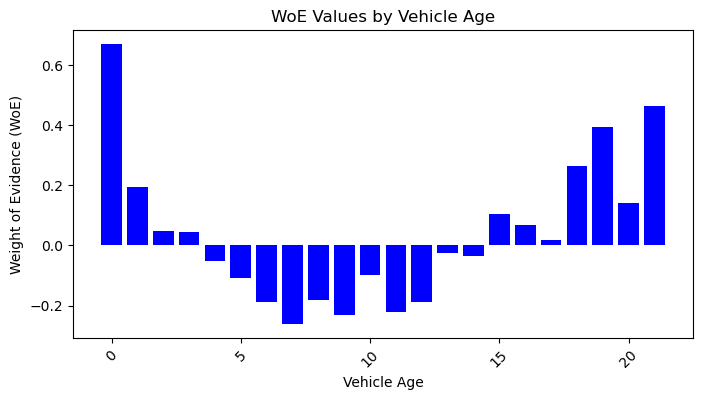

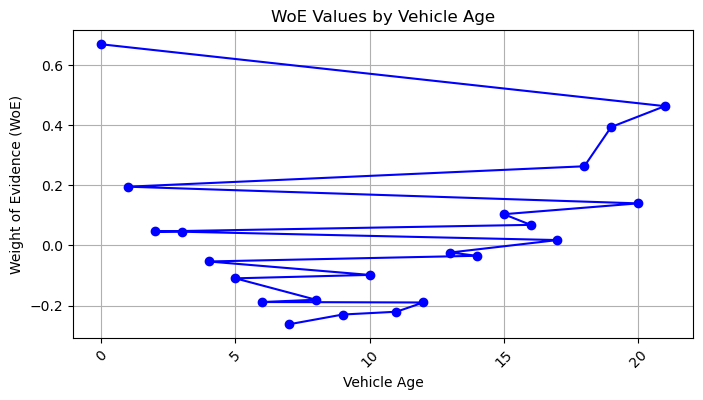

In [69]:
woe_df_4_sorted = woe_df_4.sort_values(by='WoE')

# Bar plot
plt.figure(figsize=(8, 4))
plt.bar(woe_df_4_sorted.index, woe_df_4_sorted['WoE'], color='blue')
plt.xlabel('Vehicle Age')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Vehicle Age')
plt.xticks(rotation=45)
plt.show()

# Line plot
plt.figure(figsize=(8, 4))
plt.plot(woe_df_4_sorted.index, woe_df_4_sorted['WoE'], marker='o', linestyle='-', color='blue')
plt.xlabel('Vehicle Age')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Vehicle Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [70]:
woe_df_4 = calculate_woe(aggregated_data, 'VehAge', 'Target')
woe_df_4.loc[woe_df_4["WoE"]> 0].sort_index()

Total   Bad   Good  Bad Rate  Good Rate       WoE
VehAge                                                   
0.0     57738  1106  56632  0.044400   0.086717  0.669411
1.0     71280  2168  69112  0.087033   0.105826  0.195510
2.0     59119  2077  57042  0.083380   0.087345  0.046450
3.0     50261  1767  48494  0.070935   0.074256  0.045743
15.0    23621   785  22836  0.031513   0.034967  0.103996
16.0    15265   525  14740  0.021076   0.022570  0.068508
17.0    11160   403  10757  0.016178   0.016471  0.017962
18.0     8183   233   7950  0.009354   0.012173  0.263475
19.0     5424   136   5288  0.005460   0.008097  0.394127
20.0     3365   108   3257  0.004336   0.004987  0.140017
21.0     8322   195   8127  0.007828   0.012444  0.463534

In [71]:
aggregated_data['Vehage_WoE_Mapped'] = aggregated_data['VehAge'].map(woe_df_4['WoE'])
aggregated_data.head()

IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0    1.0          0.0        0      0.10  'D'       5.0     0.0     55.0   
1    3.0          0.0        0      0.77  'D'       5.0     0.0     55.0   
2    5.0          0.0        0      0.75  'B'       6.0     2.0     52.0   
3   10.0          0.0        0      0.09  'B'       7.0     0.0     46.0   
4   11.0          0.0        0      0.84  'B'       7.0     0.0     46.0   

   BonusMalus VehBrand   VehGas  Density Region ClaimNbCategory  LogDensity  \
0        50.0    'B12'  Regular   1217.0  'R82'        0 Claims    7.104965   
1        50.0    'B12'  Regular   1217.0  'R82'        0 Claims    7.104965   
2        50.0    'B12'   Diesel     54.0  'R22'        0 Claims    4.007333   
3        50.0    'B12'   Diesel     76.0  'R72'        0 Claims    4.343805   
4        50.0    'B12'   Diesel     76.0  'R72'        0 Claims    4.343805   

   AvgClaimAmountPerExposure  Target  VehPower_VehAge  DrivAge_BonusMalus  \
0                        0.0       0              0.0              2750.0   
1                        0.0       0              0.0              2750.0   
2                        0.0       0             12.0              2600.0   
3                        0.0       0              0.0              2300.0   
4                        0.0       0              0.0              2300.0   

   Vehage_WoE_Mapped  
0           0.669411  
1           0.669411  
2           0.046450  
3           0.669411  
4           0.669411

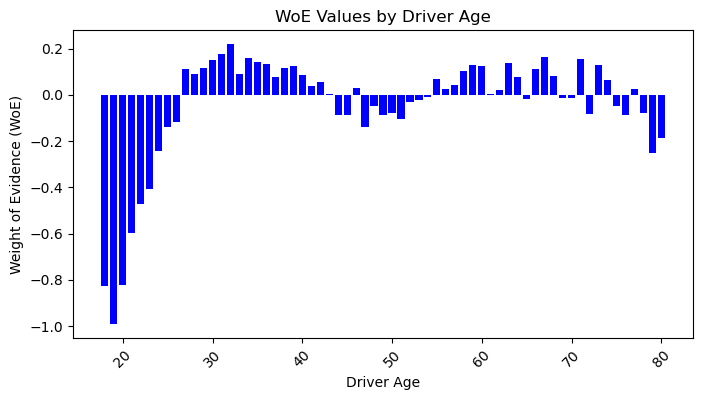

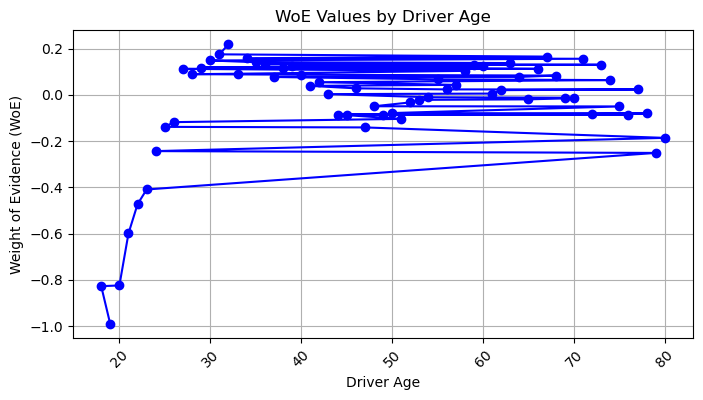

In [72]:
woe_df_5_sorted = woe_df_5.sort_values(by='WoE')

# Bar plot
plt.figure(figsize=(8, 4))
plt.bar(woe_df_5_sorted.index, woe_df_5_sorted['WoE'], color='blue')
plt.xlabel('Driver Age')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Driver Age')
plt.xticks(rotation=45)
plt.show()

# Line plot
plt.figure(figsize=(8, 4))
plt.plot(woe_df_5_sorted.index, woe_df_5_sorted['WoE'], marker='o', linestyle='-', color='blue')
plt.xlabel('Driver Age')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Driver Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [73]:
aggregated_data['Drivage_WoE_Mapped'] = aggregated_data['DrivAge'].map(woe_df_5['WoE'])
aggregated_data.head()

IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0    1.0          0.0        0      0.10  'D'       5.0     0.0     55.0   
1    3.0          0.0        0      0.77  'D'       5.0     0.0     55.0   
2    5.0          0.0        0      0.75  'B'       6.0     2.0     52.0   
3   10.0          0.0        0      0.09  'B'       7.0     0.0     46.0   
4   11.0          0.0        0      0.84  'B'       7.0     0.0     46.0   

   BonusMalus VehBrand  ... Density  Region ClaimNbCategory LogDensity  \
0        50.0    'B12'  ...  1217.0   'R82'        0 Claims   7.104965   
1        50.0    'B12'  ...  1217.0   'R82'        0 Claims   7.104965   
2        50.0    'B12'  ...    54.0   'R22'        0 Claims   4.007333   
3        50.0    'B12'  ...    76.0   'R72'        0 Claims   4.343805   
4        50.0    'B12'  ...    76.0   'R72'        0 Claims   4.343805   

   AvgClaimAmountPerExposure  Target  VehPower_VehAge  DrivAge_BonusMalus  \
0                        0.0       0              0.0              2750.0   
1                        0.0       0              0.0              2750.0   
2                        0.0       0             12.0              2600.0   
3                        0.0       0              0.0              2300.0   
4                        0.0       0              0.0              2300.0   

   Vehage_WoE_Mapped  Drivage_WoE_Mapped  
0           0.669411            0.066787  
1           0.669411            0.066787  
2           0.046450           -0.032921  
3           0.669411            0.027969  
4           0.669411            0.027969  

[5 rows x 21 columns]

In [74]:
aggregated_data['Drivage_WoE_Mapped'] = aggregated_data['Drivage_WoE_Mapped'].replace([np.inf, -np.inf], 0)
aggregated_data['Vehage_WoE_Mapped'] = aggregated_data['Vehage_WoE_Mapped'].replace([np.inf, -np.inf], 0)

##### Formatting strings in categorical columns

In [75]:
aggregated_data['VehBrand'] = aggregated_data['VehBrand'].str.replace("'", "")
aggregated_data['Region'] = aggregated_data['Region'].str.replace("'", "")
aggregated_data['Area'] = aggregated_data['Area'].str.replace("'", "")
aggregated_data.head()


IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0    1.0          0.0        0      0.10    D       5.0     0.0     55.0   
1    3.0          0.0        0      0.77    D       5.0     0.0     55.0   
2    5.0          0.0        0      0.75    B       6.0     2.0     52.0   
3   10.0          0.0        0      0.09    B       7.0     0.0     46.0   
4   11.0          0.0        0      0.84    B       7.0     0.0     46.0   

   BonusMalus VehBrand  ... Density  Region ClaimNbCategory LogDensity  \
0        50.0      B12  ...  1217.0     R82        0 Claims   7.104965   
1        50.0      B12  ...  1217.0     R82        0 Claims   7.104965   
2        50.0      B12  ...    54.0     R22        0 Claims   4.007333   
3        50.0      B12  ...    76.0     R72        0 Claims   4.343805   
4        50.0      B12  ...    76.0     R72        0 Claims   4.343805   

   AvgClaimAmountPerExposure  Target  VehPower_VehAge  DrivAge_BonusMalus  \
0                        0.0       0              0.0              2750.0   
1                        0.0       0              0.0              2750.0   
2                        0.0       0             12.0              2600.0   
3                        0.0       0              0.0              2300.0   
4                        0.0       0              0.0              2300.0   

   Vehage_WoE_Mapped  Drivage_WoE_Mapped  
0           0.669411            0.066787  
1           0.669411            0.066787  
2           0.046450           -0.032921  
3           0.669411            0.027969  
4           0.669411            0.027969  

[5 rows x 21 columns]

In [76]:
aggregated_data = aggregated_data.drop(columns=['ClaimNbCategory', 'Density'])
aggregated_data.head()

IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0    1.0          0.0        0      0.10    D       5.0     0.0     55.0   
1    3.0          0.0        0      0.77    D       5.0     0.0     55.0   
2    5.0          0.0        0      0.75    B       6.0     2.0     52.0   
3   10.0          0.0        0      0.09    B       7.0     0.0     46.0   
4   11.0          0.0        0      0.84    B       7.0     0.0     46.0   

   BonusMalus VehBrand   VehGas Region  LogDensity  AvgClaimAmountPerExposure  \
0        50.0      B12  Regular    R82    7.104965                        0.0   
1        50.0      B12  Regular    R82    7.104965                        0.0   
2        50.0      B12   Diesel    R22    4.007333                        0.0   
3        50.0      B12   Diesel    R72    4.343805                        0.0   
4        50.0      B12   Diesel    R72    4.343805                        0.0   

   Target  VehPower_VehAge  DrivAge_BonusMalus  Vehage_WoE_Mapped  \
0       0              0.0              2750.0           0.669411   
1       0              0.0              2750.0           0.669411   
2       0             12.0              2600.0           0.046450   
3       0              0.0              2300.0           0.669411   
4       0              0.0              2300.0           0.669411   

   Drivage_WoE_Mapped  
0            0.066787  
1            0.066787  
2           -0.032921  
3            0.027969  
4            0.027969

In [77]:
# Calculate WoE
def calculate_woe(df, feature, target):
    df_woe = df.groupby(feature)[target].agg(['count', 'sum'])
    df_woe.columns = ['Total', 'Bad']
    df_woe['Good'] = df_woe['Total'] - df_woe['Bad']
    df_woe['Bad Rate'] = df_woe['Bad'] / df_woe['Bad'].sum()
    df_woe['Good Rate'] = df_woe['Good'] / df_woe['Good'].sum()
    df_woe['WoE'] = np.log(df_woe['Good Rate'] / df_woe['Bad Rate'])
    return df_woe

woe_df = calculate_woe(aggregated_data, 'Region', 'Target')
woe_df["WoE"].sort_values(ascending=True)

Region
R82   -0.260600
R53   -0.152117
R54   -0.092672
R74   -0.090411
R25   -0.072174
R24   -0.061442
R52   -0.052812
R22   -0.028904
R42   -0.027499
R41    0.058639
R93    0.062271
R11    0.072490
R31    0.146705
R72    0.165368
R26    0.170234
R43    0.312465
R91    0.356738
R83    0.375452
R94    0.442405
R23    0.447859
R21    0.476684
R73    0.607113
Name: WoE, dtype: float64

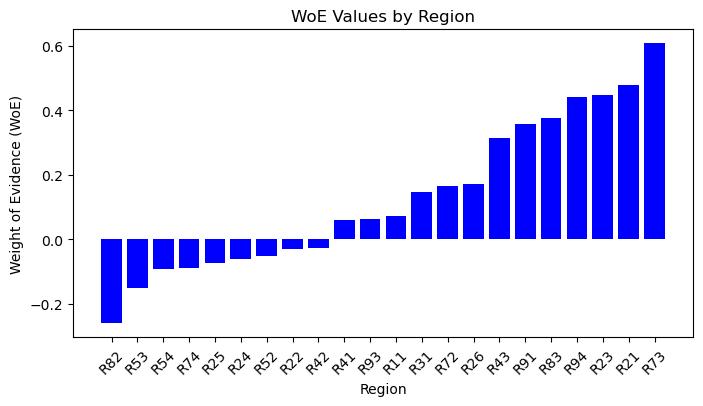

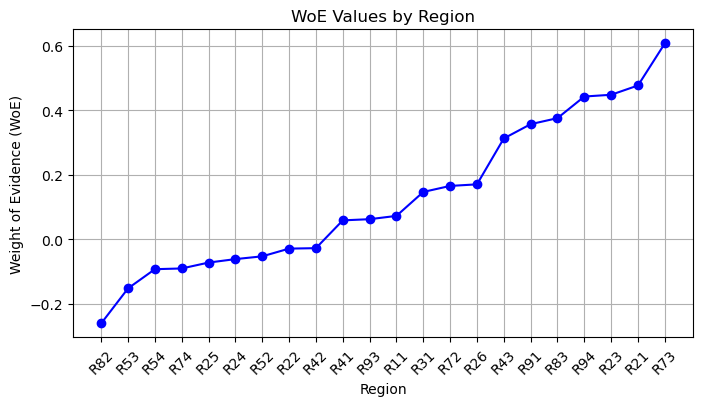

In [78]:
# Sort the DataFrame by WoE values in increasing order
woe_df_sorted = woe_df.sort_values(by='WoE')

plt.figure(figsize=(8, 4))
plt.bar(woe_df_sorted.index, woe_df_sorted['WoE'], color='blue')
plt.xlabel('Region')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Region')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(woe_df_sorted.index, woe_df_sorted['WoE'], marker='o', linestyle='-', color='blue')
plt.xlabel('Region')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### R82, R53, R74-R54-R35-R24-R52-R22-R42, R41-R93-R11, R31-R72-R26, R43-R91-R83, R94-R23-R21, R73

In [79]:
woe_df_2 = calculate_woe(aggregated_data, 'VehBrand', 'Target')
woe_df_2

Total   Bad    Good  Bad Rate  Good Rate       WoE
VehBrand                                                     
B1        162725  6498  156227  0.260859   0.239220 -0.086598
B10        17707   732   16975  0.029386   0.025993 -0.122697
B11        13583   624   12959  0.025050   0.019843 -0.233018
B12       166020  3822  162198  0.153432   0.248363  0.481631
B13        12177   510   11667  0.020474   0.017865 -0.136305
B14         4046   126    3920  0.005058   0.006002  0.171152
B2        159851  6477  153374  0.260016   0.234851 -0.101792
B3         53393  2302   51091  0.092413   0.078232 -0.166583
B4         25177  1051   24126  0.042192   0.036942 -0.132865
B5         34753  1580   33173  0.063428   0.050796 -0.222102
B6         28547  1188   27359  0.047692   0.041893 -0.129639

In [80]:
woe_df_2.index

Index(['B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B2', 'B3', 'B4', 'B5', 'B6'], dtype='object', name='VehBrand')

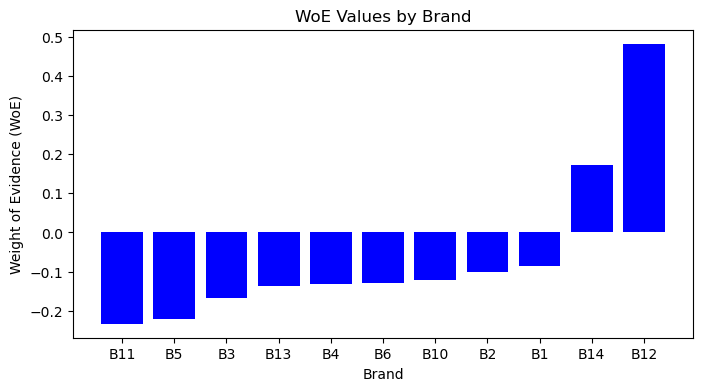

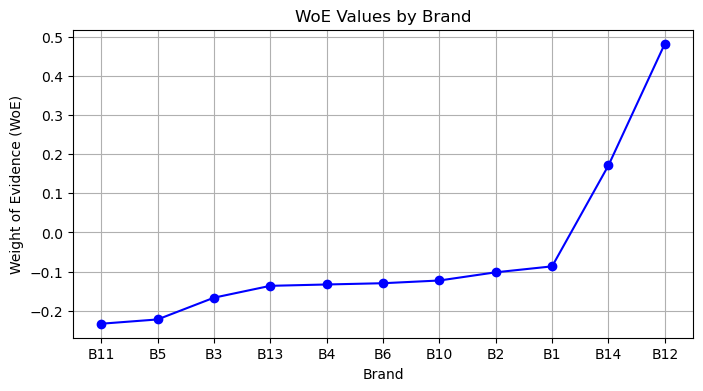

In [81]:
# Sort the DataFrame by WoE values in increasing order
woe_df_2_sorted = woe_df_2.sort_values(by='WoE')

plt.figure(figsize=(8, 4))
plt.bar(woe_df_2_sorted.index, woe_df_2_sorted['WoE'], color='blue')
plt.xlabel('Brand')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Brand')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(woe_df_2_sorted.index, woe_df_2_sorted['WoE'], marker='o', linestyle='-', color='blue')
plt.xlabel('Brand')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Brand')
plt.grid(True)
plt.show()

#### B11, B5, B3-B13-B4-B6-B10-B2-B1, B14, B12

In [82]:
woe_df_3 = calculate_woe(aggregated_data, 'Area', 'Target')
woe_df_3

Total   Bad    Good  Bad Rate  Good Rate       WoE
Area                                                     
A     103956  3236  100720  0.129908   0.154226  0.171593
B      75459  2524   72935  0.101325   0.111680  0.097310
C     191874  6724  185150  0.269932   0.283508  0.049070
D     151583  6030  145553  0.242071   0.222875 -0.082620
E     137153  5683  131470  0.228141   0.201311 -0.125114
F      17954   713   17241  0.028623   0.026400 -0.080849

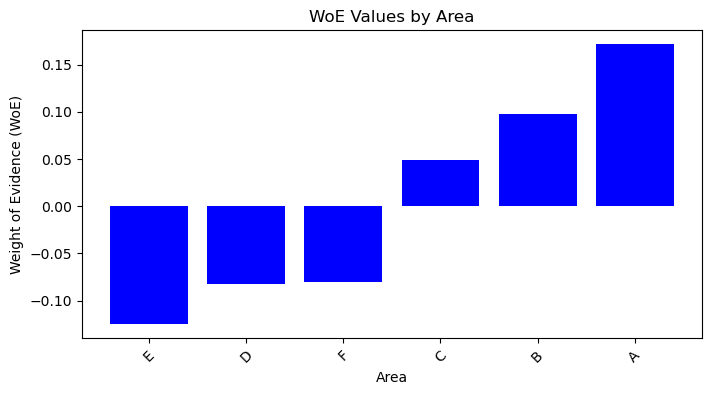

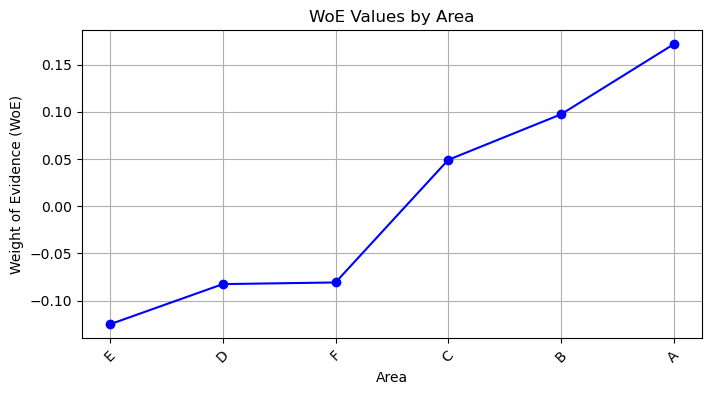

In [83]:
# Sort the DataFrame by WoE values in increasing order
woe_df_3_sorted = woe_df_3.sort_values(by='WoE')

plt.figure(figsize=(8, 4))
plt.bar(woe_df_3_sorted.index, woe_df_3_sorted['WoE'], color='blue')
plt.xlabel('Area')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Area')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(woe_df_3_sorted.index, woe_df_3_sorted['WoE'], marker='o', linestyle='-', color='blue')
plt.xlabel('Area')
plt.ylabel('Weight of Evidence (WoE)')
plt.title('WoE Values by Area')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [84]:
grouped_brands = ['B3', 'B13', 'B4', 'B6', 'B10', 'B2', 'B1']
aggregated_data['Vehbrand_Grouped'] = aggregated_data['VehBrand'].apply(lambda x: 'Group1' if x in grouped_brands else x)
grouped_areas = ['D', 'E', 'F']
aggregated_data['Area_Grouped'] = aggregated_data['Area'].apply(lambda x: 'GroupDEF' if x in grouped_areas else x)
region_groups = {
    'R82': 'GroupR82',
    'R53': 'GroupR53',
    'R74': 'GroupR74_R54_R25_R24_R52_R22_R42',
    'R54': 'GroupR74_R54_R25_R24_R52_R22_R42',
    'R25': 'GroupR74_R54_R25_R24_R52_R22_R42',
    'R24': 'GroupR74_R54_R25_R24_R52_R22_R42',
    'R52': 'GroupR74_R54_R25_R24_R52_R22_R42',
    'R22': 'GroupR74_R54_R25_R24_R52_R22_R42',
    'R42': 'GroupR74_R54_R25_R24_R52_R22_R42',
    'R41': 'GroupR41_R93_R11',
    'R93': 'GroupR41_R93_R11',
    'R11': 'GroupR41_R93_R11',
    'R31': 'GroupR31_R72_R26',
    'R72': 'GroupR31_R72_R26',
    'R26': 'GroupR31_R72_R26',
    'R43': 'GroupR43_R91_R83',
    'R91': 'GroupR43_R91_R83',
    'R83': 'GroupR43_R91_R83',
    'R94': 'GroupR94_R23_R21',
    'R23': 'GroupR94_R23_R21',
    'R21': 'GroupR94_R23_R21',
    'R73': 'GroupR73'
}
aggregated_data['Region_Grouped'] = aggregated_data['Region'].apply(lambda x: region_groups.get(x, x))

In [85]:
aggregated_data.head()

IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  \
0    1.0          0.0        0      0.10    D       5.0     0.0     55.0   
1    3.0          0.0        0      0.77    D       5.0     0.0     55.0   
2    5.0          0.0        0      0.75    B       6.0     2.0     52.0   
3   10.0          0.0        0      0.09    B       7.0     0.0     46.0   
4   11.0          0.0        0      0.84    B       7.0     0.0     46.0   

   BonusMalus VehBrand  ... LogDensity AvgClaimAmountPerExposure  Target  \
0        50.0      B12  ...   7.104965                       0.0       0   
1        50.0      B12  ...   7.104965                       0.0       0   
2        50.0      B12  ...   4.007333                       0.0       0   
3        50.0      B12  ...   4.343805                       0.0       0   
4        50.0      B12  ...   4.343805                       0.0       0   

   VehPower_VehAge  DrivAge_BonusMalus  Vehage_WoE_Mapped  Drivage_WoE_Mapped  \
0              0.0              2750.0           0.669411            0.066787   
1              0.0              2750.0           0.669411            0.066787   
2             12.0              2600.0           0.046450           -0.032921   
3              0.0              2300.0           0.669411            0.027969   
4              0.0              2300.0           0.669411            0.027969   

   Vehbrand_Grouped  Area_Grouped                    Region_Grouped  
0               B12      GroupDEF                          GroupR82  
1               B12      GroupDEF                          GroupR82  
2               B12             B  GroupR74_R54_R25_R24_R52_R22_R42  
3               B12             B                  GroupR31_R72_R26  
4               B12             B                  GroupR31_R72_R26  

[5 rows x 22 columns]

In [86]:
columns_to_drop = ['VehAge', 'VehBrand', 'Area', 'Region', 'DrivAge']
aggregated_data = aggregated_data.drop(columns=columns_to_drop)
aggregated_data.head()

IDpol  ClaimAmount  ClaimNb  Exposure  VehPower  BonusMalus   VehGas  \
0    1.0          0.0        0      0.10       5.0        50.0  Regular   
1    3.0          0.0        0      0.77       5.0        50.0  Regular   
2    5.0          0.0        0      0.75       6.0        50.0   Diesel   
3   10.0          0.0        0      0.09       7.0        50.0   Diesel   
4   11.0          0.0        0      0.84       7.0        50.0   Diesel   

   LogDensity  AvgClaimAmountPerExposure  Target  VehPower_VehAge  \
0    7.104965                        0.0       0              0.0   
1    7.104965                        0.0       0              0.0   
2    4.007333                        0.0       0             12.0   
3    4.343805                        0.0       0              0.0   
4    4.343805                        0.0       0              0.0   

   DrivAge_BonusMalus  Vehage_WoE_Mapped  Drivage_WoE_Mapped Vehbrand_Grouped  \
0              2750.0           0.669411            0.066787              B12   
1              2750.0           0.669411            0.066787              B12   
2              2600.0           0.046450           -0.032921              B12   
3              2300.0           0.669411            0.027969              B12   
4              2300.0           0.669411            0.027969              B12   

  Area_Grouped                    Region_Grouped  
0     GroupDEF                          GroupR82  
1     GroupDEF                          GroupR82  
2            B  GroupR74_R54_R25_R24_R52_R22_R42  
3            B                  GroupR31_R72_R26  
4            B                  GroupR31_R72_R26

##### One-hot Encoding of Age gruops and Gas Type of the vehicles

In [87]:
aggregated_data = pd.get_dummies(aggregated_data, columns=['VehGas', 'Vehbrand_Grouped', 'Area_Grouped', 'Region_Grouped'], drop_first=True)
aggregated_data = aggregated_data.replace({True: 1, False: 0})
aggregated_data.head()

IDpol  ClaimAmount  ClaimNb  Exposure  VehPower  BonusMalus  LogDensity  \
0    1.0          0.0        0      0.10       5.0        50.0    7.104965   
1    3.0          0.0        0      0.77       5.0        50.0    7.104965   
2    5.0          0.0        0      0.75       6.0        50.0    4.007333   
3   10.0          0.0        0      0.09       7.0        50.0    4.343805   
4   11.0          0.0        0      0.84       7.0        50.0    4.343805   

   AvgClaimAmountPerExposure  Target  VehPower_VehAge  ...  Area_Grouped_B  \
0                        0.0       0              0.0  ...               0   
1                        0.0       0              0.0  ...               0   
2                        0.0       0             12.0  ...               1   
3                        0.0       0              0.0  ...               1   
4                        0.0       0              0.0  ...               1   

   Area_Grouped_C  Area_Grouped_GroupDEF  Region_Grouped_GroupR41_R93_R11  \
0               0                      1                                0   
1               0                      1                                0   
2               0                      0                                0   
3               0                      0                                0   
4               0                      0                                0   

   Region_Grouped_GroupR43_R91_R83  Region_Grouped_GroupR53  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   Region_Grouped_GroupR73  Region_Grouped_GroupR74_R54_R25_R24_R52_R22_R42  \
0                        0                                                0   
1                        0                                                0   
2                        0                                                1   
3                        0                                                0   
4                        0                                                0   

   Region_Grouped_GroupR82  Region_Grouped_GroupR94_R23_R21  
0                        1                                0  
1                        1                                0  
2                        0                                0  
3                        0                                0  
4                        0                                0  

[5 rows x 28 columns]

In [88]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677979 entries, 0 to 678012
Data columns (total 28 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   IDpol                                            677979 non-null  float64
 1   ClaimAmount                                      677979 non-null  float64
 2   ClaimNb                                          677979 non-null  int64  
 3   Exposure                                         677979 non-null  float64
 4   VehPower                                         677979 non-null  float64
 5   BonusMalus                                       677979 non-null  float64
 6   LogDensity                                       677979 non-null  float64
 7   AvgClaimAmountPerExposure                        677979 non-null  float64
 8   Target                                           677979 non-null  int64  
 9   VehPower_VehAge     

##### Scaling numerical columns

In [89]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['LogDensity', 'BonusMalus', 'VehPower', 'Exposure',"VehPower_VehAge", "DrivAge_BonusMalus", 'Vehage_WoE_Mapped',"Drivage_WoE_Mapped" ]
scaler = StandardScaler()
aggregated_data[columns_to_scale] = scaler.fit_transform(aggregated_data[columns_to_scale])
aggregated_data.head()

IDpol  ClaimAmount  ClaimNb  Exposure  VehPower  BonusMalus  LogDensity  \
0    1.0          0.0        0 -1.171731 -0.718844   -0.636594    0.599408   
1    3.0          0.0        0  0.653436 -0.718844   -0.636594    0.599408   
2    5.0          0.0        0  0.598953 -0.220524   -0.636594   -1.069342   
3   10.0          0.0        0 -1.198972  0.277796   -0.636594   -0.888078   
4   11.0          0.0        0  0.844125  0.277796   -0.636594   -0.888078   

   AvgClaimAmountPerExposure  Target  VehPower_VehAge  ...  Area_Grouped_B  \
0                        0.0       0        -1.138919  ...               0   
1                        0.0       0        -1.138919  ...               0   
2                        0.0       0        -0.834678  ...               1   
3                        0.0       0        -1.138919  ...               1   
4                        0.0       0        -1.138919  ...               1   

   Area_Grouped_C  Area_Grouped_GroupDEF  Region_Grouped_GroupR41_R93_R11  \
0               0                      1                                0   
1               0                      1                                0   
2               0                      0                                0   
3               0                      0                                0   
4               0                      0                                0   

   Region_Grouped_GroupR43_R91_R83  Region_Grouped_GroupR53  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   Region_Grouped_GroupR73  Region_Grouped_GroupR74_R54_R25_R24_R52_R22_R42  \
0                        0                                                0   
1                        0                                                0   
2                        0                                                1   
3                        0                                                0   
4                        0                                                0   

   Region_Grouped_GroupR82  Region_Grouped_GroupR94_R23_R21  
0                        1                                0  
1                        1                                0  
2                        0                                0  
3                        0                                0  
4                        0                                0  

[5 rows x 28 columns]

In [90]:
aggregated_data.columns

Index(['IDpol', 'ClaimAmount', 'ClaimNb', 'Exposure', 'VehPower', 'BonusMalus',
       'LogDensity', 'AvgClaimAmountPerExposure', 'Target', 'VehPower_VehAge',
       'DrivAge_BonusMalus', 'Vehage_WoE_Mapped', 'Drivage_WoE_Mapped',
       'VehGas_Regular', 'Vehbrand_Grouped_B12', 'Vehbrand_Grouped_B14',
       'Vehbrand_Grouped_B5', 'Vehbrand_Grouped_Group1', 'Area_Grouped_B',
       'Area_Grouped_C', 'Area_Grouped_GroupDEF',
       'Region_Grouped_GroupR41_R93_R11', 'Region_Grouped_GroupR43_R91_R83',
       'Region_Grouped_GroupR53', 'Region_Grouped_GroupR73',
       'Region_Grouped_GroupR74_R54_R25_R24_R52_R22_R42',
       'Region_Grouped_GroupR82', 'Region_Grouped_GroupR94_R23_R21'],
      dtype='object')

##### Selection of train and test datasets

In [91]:
from sklearn.model_selection import train_test_split
X = aggregated_data.drop(columns=['Target',"ClaimAmount", "AvgClaimAmountPerExposure","IDpol", "ClaimNb"])
y = aggregated_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training set target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Training set target distribution:
Target
0    0.963258
1    0.036742
Name: proportion, dtype: float64

Test set target distribution:
Target
0    0.963259
1    0.036741
Name: proportion, dtype: float64


In [92]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Define the models
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')
brf_model = BalancedRandomForestClassifier(random_state=42)
nb_model = GaussianNB()

# List of models
models = [
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model),
    ('Logistic Regression', logreg_model),
    ('Balanced Random Forest', brf_model),
    ('Naive Bayes', nb_model)
]

for name, model in models:
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")

Evaluating XGBoost...
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.70      0.81    130614
           1       0.07      0.58      0.12      4982

    accuracy                           0.69    135596
   macro avg       0.52      0.64      0.47    135596
weighted avg       0.94      0.69      0.79    135596


Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 19928, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 542383, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report for LightGB

In [93]:
import joblib

# Save the model to a file
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [94]:
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

Predicted probabilities for the positive class:
 [0.21706949 0.47392014 0.2754913  ... 0.6902942  0.5423268  0.30518743]


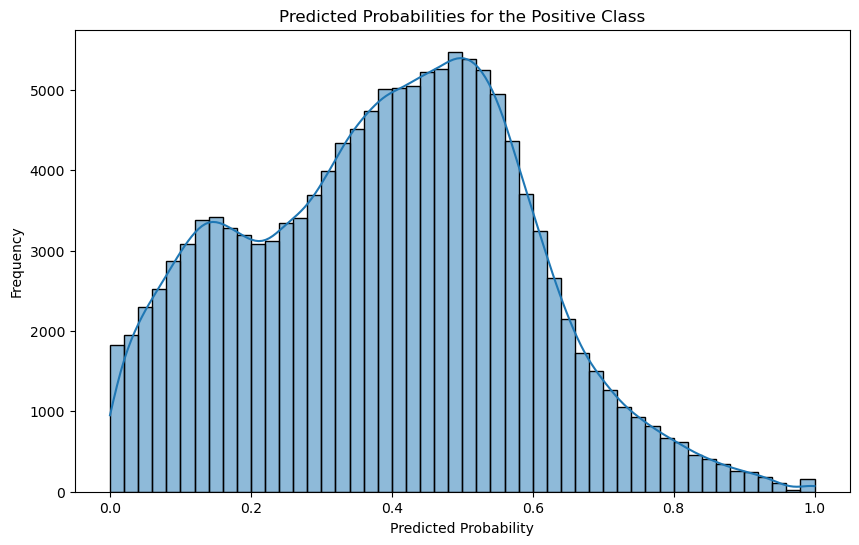

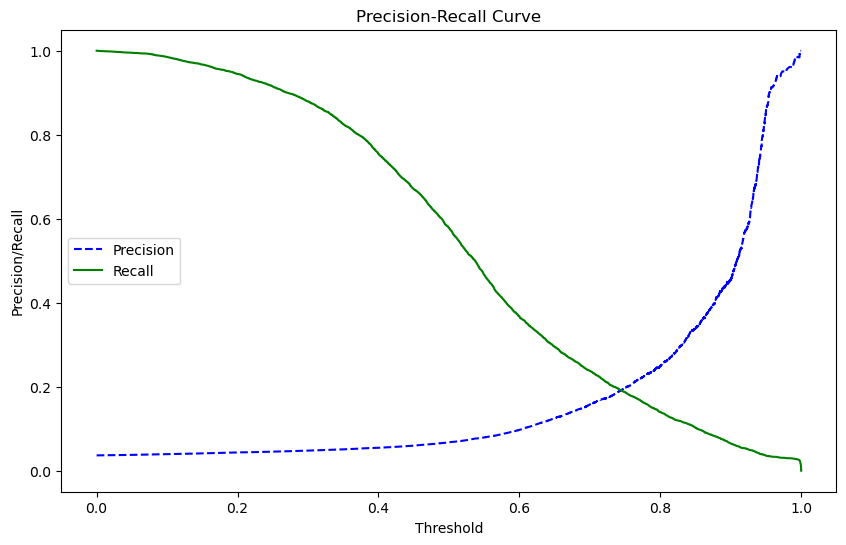

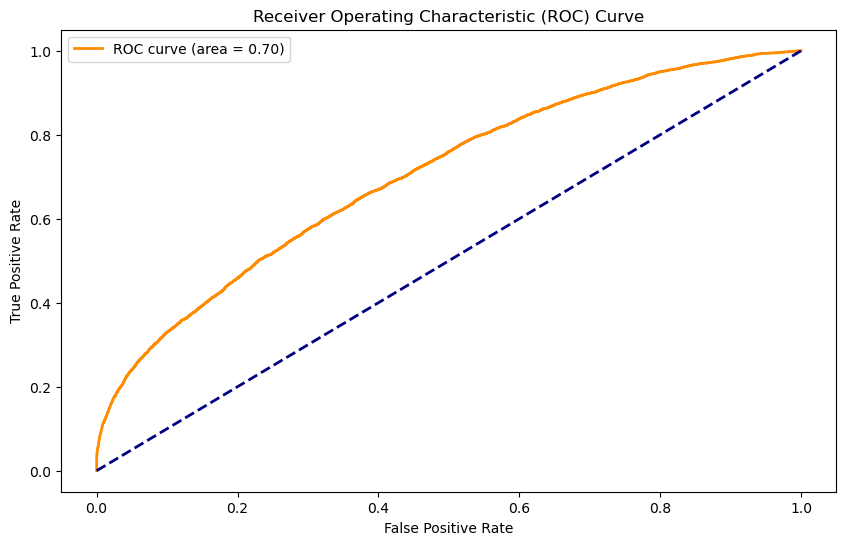

Optimal Threshold: 0.4905528724193573
              precision    recall  f1-score   support

           0       0.98      0.68      0.80    130614
           1       0.07      0.60      0.12      4982

    accuracy                           0.67    135596
   macro avg       0.52      0.64      0.46    135596
weighted avg       0.94      0.67      0.78    135596



In [95]:

from sklearn.metrics import auc, precision_recall_curve, roc_curve

print("Predicted probabilities for the positive class:\n", y_pred_proba)

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=50, kde=True)
plt.title('Predicted Probabilities for the Positive Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# Plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(thresholds_pr, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds_pr, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Select threshold based on desired balance between precision and recall
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds_roc[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

# Convert probabilities to class labels using the optimal threshold
y_pred_labels = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred_labels))

Evaluating XGBoost...
ROC AUC for XGBoost: 0.7030

Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 19928, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 542383, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
ROC AUC for LightGBM: 0.7181

Evaluating Logistic Regression...
ROC AUC for Logistic Regression: 0.6896

Evaluating Balanced Random Forest...
ROC AUC for Balanced Random Forest: 0.6973

Evaluating Naive Bayes...
ROC AUC for Naive Bayes: 0.6397



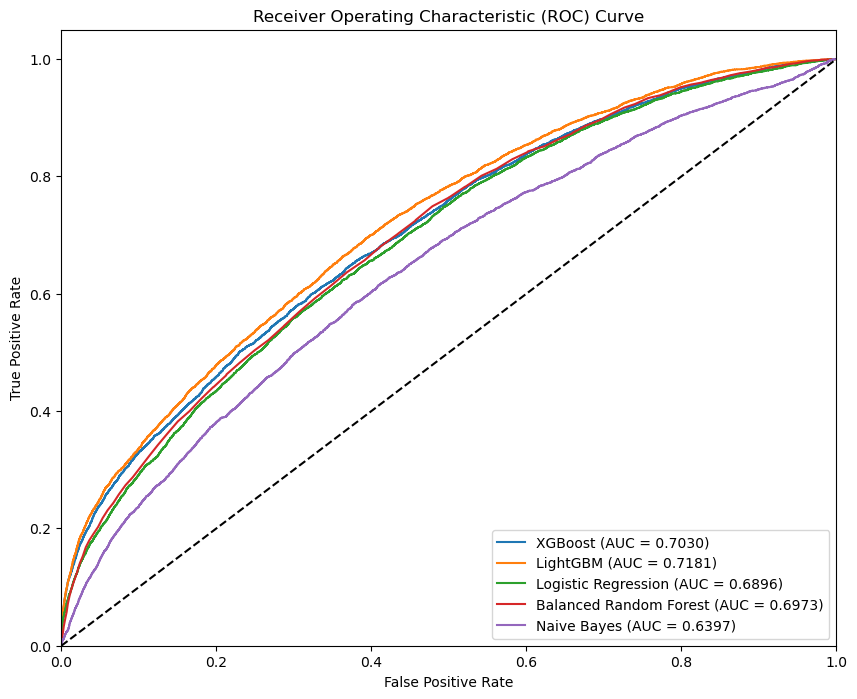

In [196]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10, 8))
for name, model in models:
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    
    # ROC AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"ROC AUC for {name}: {roc_auc:.4f}\n")
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### implementing SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
xgb_model = XGBClassifier(random_state=42,scale_pos_weight=27 )
lgbm_model = LGBMClassifier(random_state=42, class_weight="balanced")
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')

# List of models
models = [
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model),
    ('Logistic Regression', logreg_model)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit and evaluate each model separately
for name, model in models:
    print(f"Evaluating {name}...")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print(f"Test Accuracy for {name}: {accuracy:.4f}\n")
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")

Evaluating XGBoost...
Test Accuracy for XGBoost: 0.4158

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.40      0.57    130614
           1       0.05      0.82      0.09      4982

    accuracy                           0.42    135596
   macro avg       0.52      0.61      0.33    135596
weighted avg       0.95      0.42      0.55    135596


Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 522455, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2070
[LightGBM] [Info] Number of data points in the train set: 1044910, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Test Accuracy for LightGBM: 0.9632

Classification

In [95]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

def xgb_cv(n_estimators, learning_rate, max_depth, subsample, colsample_bytree, scale_pos_weight):
    model = XGBClassifier(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )
    cv_score = cross_val_score(model, X_train_smote, y_train_smote, cv=3, scoring='f1').mean()
    return cv_score

param_bounds = {
    'n_estimators': (300, 500),
    'learning_rate': (0.001, 0.1),
    'max_depth': (3, 5),
    'subsample': (0.8, 1.0),
    'colsample_bytree': (0.8, 1.0),
    'scale_pos_weight': (1, 27)  # Adjusted to a continuous range
}

optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(
    init_points=5,
    n_iter=25
)

print("Best hyperparameters found: ", optimizer.max)
print("Best score: ", optimizer.max['target'])


|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | scale_... | subsample |
-------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [ ]:
# Train XGBoost with the best hyperparameters found
best_params = {
    'colsample_bytree': 0.8116,
    'learning_rate':  0.08675,
    'max_depth': int(4.202),
    'n_estimators': int(441.6),
    'scale_pos_weight':5 ,
    'subsample': 0.994,
    'random_state': 42
}

xgb_model_best = XGBClassifier(**best_params)
xgb_model_best.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_best = xgb_model_best.predict(X_test)
accuracy_best = xgb_model_best.score(X_test, y_test)
report_best = classification_report(y_test, y_pred_best)

print(f"Test Accuracy for XGBoost with best hyperparameters: {accuracy_best:.4f}\n")
print(f"Classification Report for XGBoost with best hyperparameters:\n{report_best}\n")

Test Accuracy for XGBoost with best hyperparameters: 0.8830

Classification Report for XGBoost with best hyperparameters:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94    130614
           1       0.11      0.30      0.16      4982

    accuracy                           0.88    135596
   macro avg       0.54      0.60      0.55    135596
weighted avg       0.94      0.88      0.91    135596




Predicted probabilities for the positive class:
 [0.27305502 0.3183308  0.739915   ... 0.6640553  0.7575051  0.23667814]


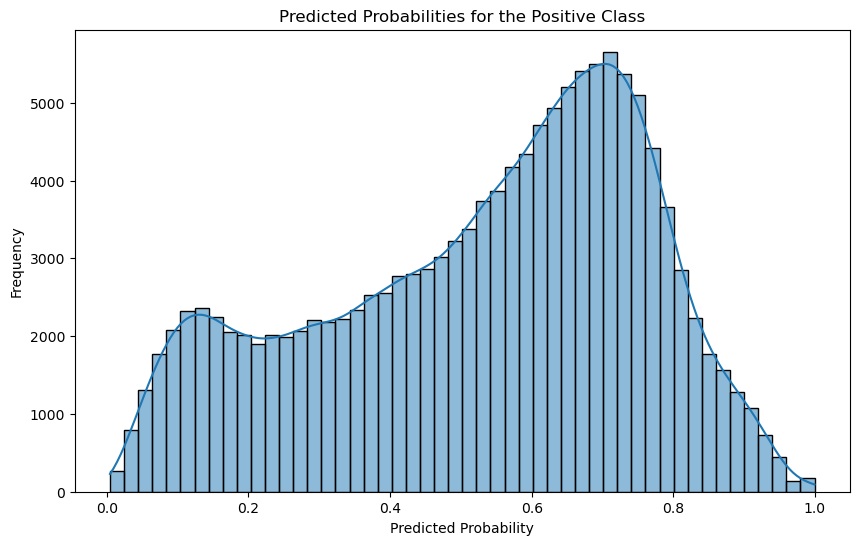

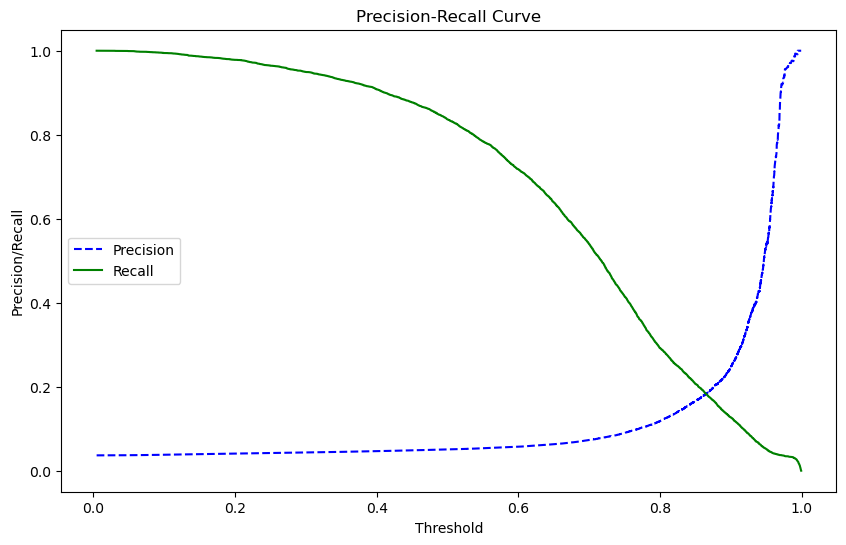

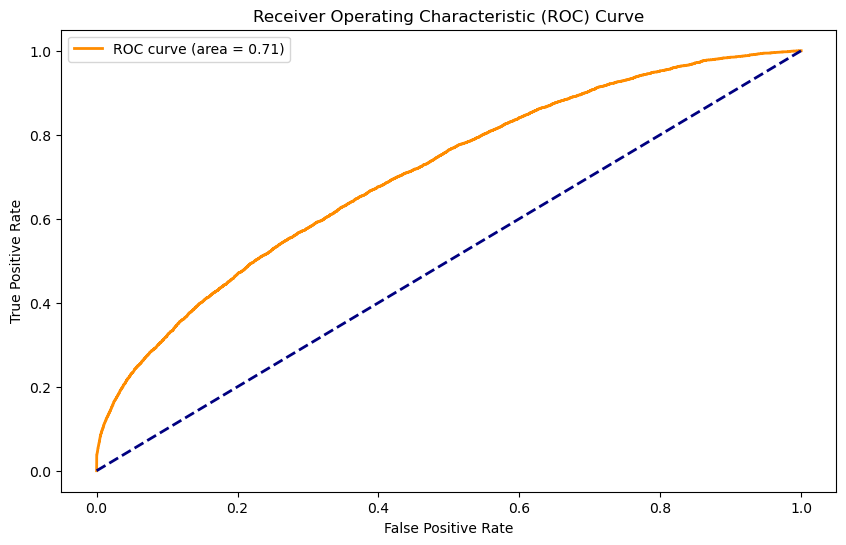

Optimal Threshold: 0.6869305968284607
              precision    recall  f1-score   support

           0       0.98      0.71      0.82    130614
           1       0.07      0.57      0.13      4989

    accuracy                           0.71    135603
   macro avg       0.52      0.64      0.47    135603
weighted avg       0.94      0.71      0.80    135603



In [ ]:

from sklearn.metrics import auc, precision_recall_curve


print("Predicted probabilities for the positive class:\n", y_pred_proba[:, 1])

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba[:, 1], bins=50, kde=True)
plt.title('Predicted Probabilities for the Positive Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# Plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(thresholds_pr, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds_pr, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Select threshold based on desired balance between precision and recall
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds_roc[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

# Convert probabilities to class labels using the optimal threshold
y_pred_labels = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred_labels))

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

# Define the parameter space for LightGBM
param_space_lgbm = {
    'n_estimators': (200, 500),
    'learning_rate': (0.001, 0.1),
    'max_depth': (3, 5),
    'subsample': (0.8, 1.0),
    'colsample_bytree': (0.8, 1.0)
}

# Define the cross-validation function for LightGBM
def lgbm_cv(n_estimators, learning_rate, max_depth, subsample, colsample_bytree):
    model = LGBMClassifier(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        class_weight='balanced',
        random_state=42
    )
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return cv_score

# Initialize the Bayesian optimizer
optimizer = BayesianOptimization(
    f=lgbm_cv,
    pbounds=param_space_lgbm,
    random_state=42,
    verbose=2
)

# Maximize the objective function
optimizer.maximize(
    init_points=5,
    n_iter=25
)

print("Best hyperparameters found: ", optimizer.max)
print("Best score: ", optimizer.max['target'])


|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 13303, number of negative: 348303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 361606, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [ ]:
best_params_lgbm = {
    'class_weight': 'balanced',
    'colsample_bytree': 0.8165002894003561,
    'learning_rate': 0.09047694913835362,
    'max_depth': int(4.187481073653913),
    'n_estimators': int(424.9282956738276),
    'subsample': 0.9496174221379735
}

lgbm_model = LGBMClassifier(random_state=42, **best_params_lgbm)

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


[LightGBM] [Info] Number of positive: 19955, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 542410, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

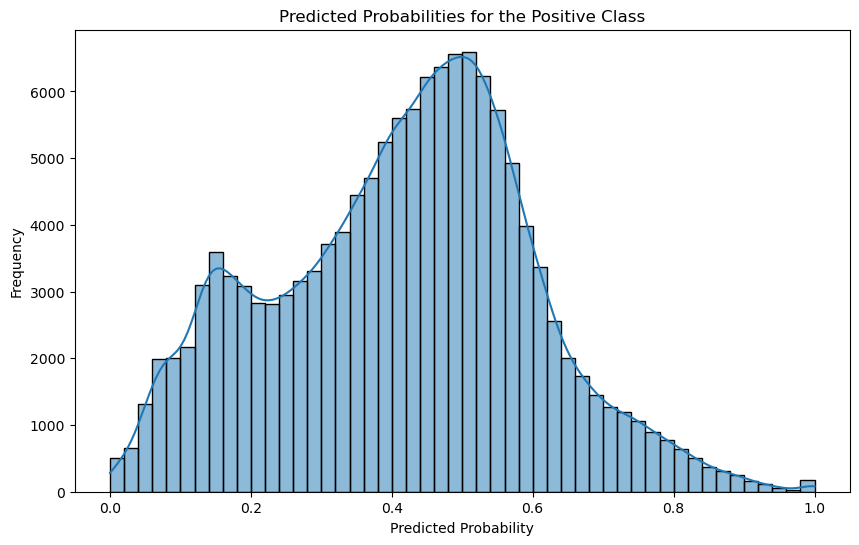

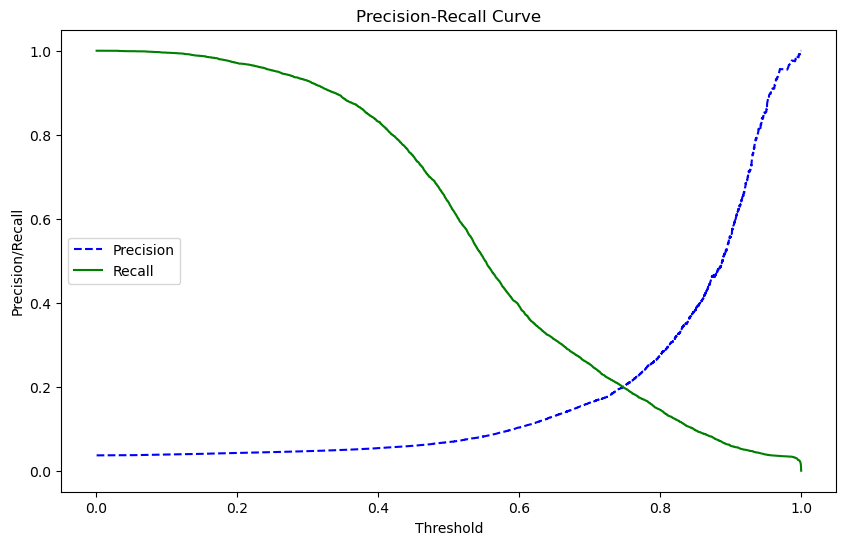

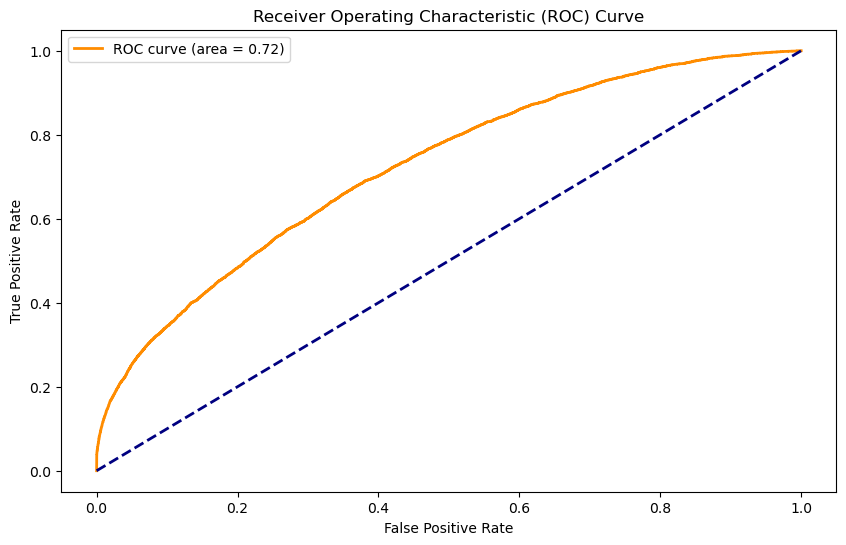

Optimal Threshold: 0.4859835806951445
              precision    recall  f1-score   support

           0       0.98      0.63      0.77    130614
           1       0.07      0.67      0.12      4989

    accuracy                           0.64    135603
   macro avg       0.52      0.65      0.45    135603
weighted avg       0.95      0.64      0.75    135603



In [ ]:

from sklearn.metrics import auc, precision_recall_curve

y_pred_proba2 = lgbm_model.predict_proba(X_test)

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba2[:, 1], bins=50, kde=True)
plt.title('Predicted Probabilities for the Positive Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# Plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba2[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(thresholds_pr, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds_pr, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba2[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Select threshold based on desired balance between precision and recall
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds_roc[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold}')

# Convert probabilities to class labels using the optimal threshold
y_pred_labels = (y_pred_proba2[:, 1] >= optimal_threshold).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred_labels))

In [ ]:
import joblib
from IPython.display import FileLink
import os


desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
joblib_file = os.path.join(desktop_path, "lgbm_model.pkl")
joblib.dump(lgbm_model, joblib_file)
FileLink(joblib_file)

/Users/ayseljafarova/Desktop/lgbm_model.pkl

Feature Importances:
                                             Feature  Importance
6                                 Vehage_WoE_Mapped    0.193526
1                                          VehPower    0.119683
7                                Drivage_WoE_Mapped    0.099318
0                                          Exposure    0.081406
19                          Region_Grouped_GroupR73    0.079143
2                                        BonusMalus    0.066228
9                              Vehbrand_Grouped_B12    0.044309
8                                    VehGas_Regular    0.043437
22                  Region_Grouped_GroupR94_R23_R21    0.041334
4                                   VehPower_VehAge    0.038006
5                                DrivAge_BonusMalus    0.036577
18                          Region_Grouped_GroupR53    0.025703
3                                        LogDensity    0.024486
17                  Region_Grouped_GroupR43_R91_R83    0.022802
12                

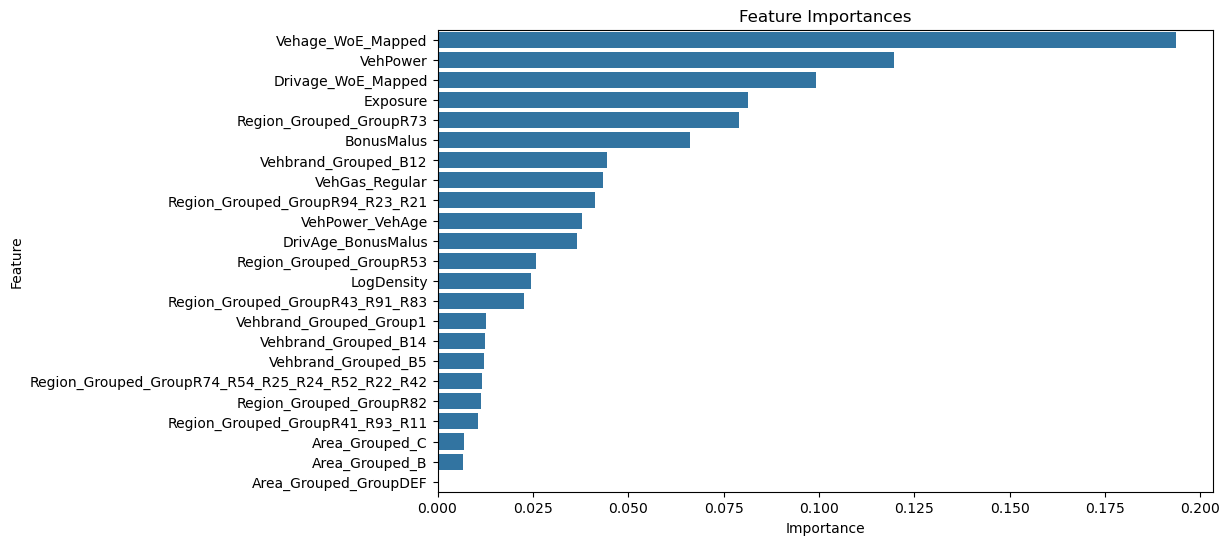

In [ ]:
feature_importances = xgb_model_best.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Feature Importances:
                                             Feature  Importance
0                                          Exposure        1197
2                                        BonusMalus         742
4                                   VehPower_VehAge         735
5                                DrivAge_BonusMalus         730
3                                        LogDensity         689
7                                Drivage_WoE_Mapped         474
6                                 Vehage_WoE_Mapped         387
1                                          VehPower         345
9                              Vehbrand_Grouped_B12         132
20  Region_Grouped_GroupR74_R54_R25_R24_R52_R22_R42          72
17                  Region_Grouped_GroupR43_R91_R83          68
8                                    VehGas_Regular          63
21                          Region_Grouped_GroupR82          53
12                          Vehbrand_Grouped_Group1          52
22                

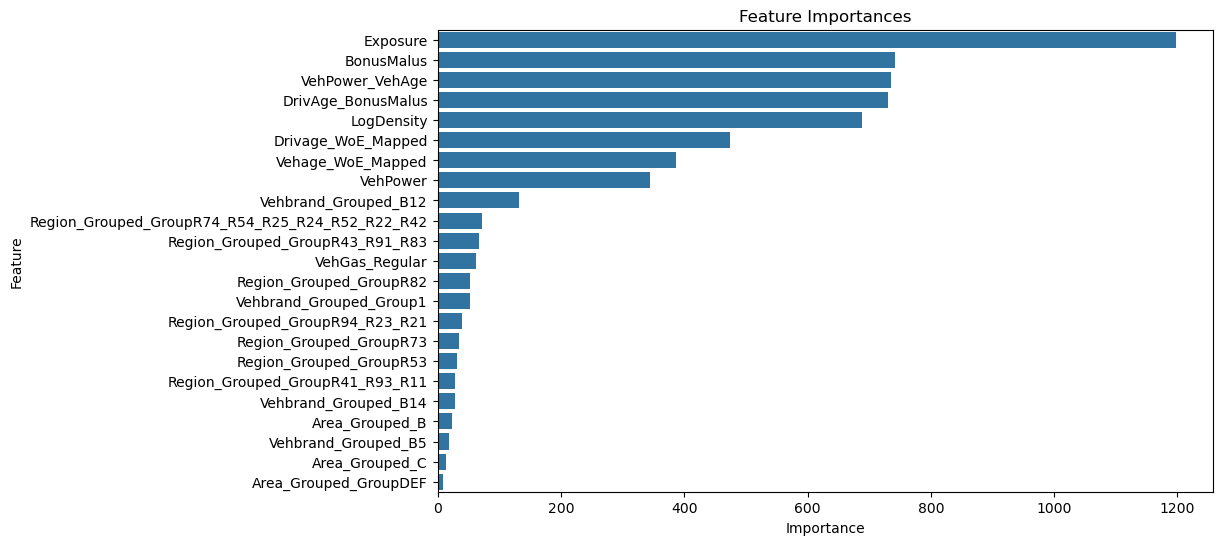

In [ ]:
feature_importances = lgbm_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
y_pred_proba = xgb_model_best.predict_proba(X)
aggregated_data['Predicted_Probability'] = y_pred_proba[:, 1]

print(aggregated_data.head())

y_pred = xgb_model_best.predict(X)
accuracy = xgb_model_best.score(X, y)
report = classification_report(y, y_pred)

print(f"Accuracy for XGBoost with best hyperparameters: {accuracy:.4f}\n")
print(f"Classification Report for XGBoost with best hyperparameters:\n{report}\n")

   IDpol  ClaimAmount  ClaimNb  Exposure  VehPower  BonusMalus  LogDensity  \
0    1.0          0.0        0 -1.170791 -0.709263   -0.624271    0.599379   
1    3.0          0.0        0  0.652412 -0.709263   -0.624271    0.599379   
2    5.0          0.0        0  0.597988 -0.221674   -0.624271   -1.069377   
3   10.0          0.0        0 -1.198003  0.265916   -0.624271   -0.888113   
4   11.0          0.0        0  0.842896  0.265916   -0.624271   -0.888113   

   AvgClaimAmountPerExposure  Target  VehPower_VehAge  ...  Area_Grouped_C  \
0                        0.0       0        -1.090714  ...               0   
1                        0.0       0        -1.090714  ...               0   
2                        0.0       0        -0.802409  ...               0   
3                        0.0       0        -1.090714  ...               0   
4                        0.0       0        -1.090714  ...               0   

   Area_Grouped_GroupDEF  Region_Grouped_GroupR41_R93_R11  \
0

In [ ]:

models2 = ['Xgboost Tuned', 'Logistic Regression Tuned', 'LightGBM Tuned']
metrics2 = ['Precision', 'Recall', 'ROC Value', 'Accuracy']

df1 = pd.DataFrame(np.random.uniform(0.8, 0.9, (3, 4)), index=models2, columns=metrics2)
df2 = pd.DataFrame(np.random.uniform(0.8, 0.9, (3, 4)), index=models2, columns=metrics2)
df3 = pd.DataFrame(np.random.uniform(0.8, 0.9, (3, 4)), index=models2, columns=metrics2)

# Concatenate DataFrames along columns with multi-level column index
combined_df = pd.concat([df1, df2, df3], axis=1, keys=['1st Itr', '2nd Itr', '3rd Itr'])
combined_df = combined_df.swaplevel(axis=1).sort_index(axis=1)

# Create another combined DataFrame where values from df1 and df2 are available
combined_df_1_2 = pd.concat([df1, df2], axis=1, keys=['1st Itr', '2nd Itr'])
combined_df_1_2 = combined_df_1_2.swaplevel(axis=1).sort_index(axis=1)



In [ ]:
import pandas as pd
models2 = ['Xgboost Tuned', 'LightGBM Tuned', 'Logistic Regression Tuned']
metrics2 = ['Precision', 'Recall', 'ROC Value', 'Accuracy']

data = {
    'Precision': [0.04, 0.12, 0.05],
    'Recall': [0.86, 0.12, 0.39],
    'ROC Value': [0.6598, 0.6695, 0.6477],
    'Accuracy': [0.6, 0.65, 0.64]
}

df1 = pd.DataFrame(data, index=models2, columns=metrics2)

data2 = {
    'Precision': [0.06, 0.07, 0.66],
    'Recall': [0.70, 0.43, 0.06],
    'ROC Value': [0.7161, 0.7236, 0.6890],
    'Accuracy': [0.55, 0.78, 0.65]
}

df2 = pd.DataFrame(data2, index=models2, columns=metrics2)

data3 = {
    'Precision': [0.11, 0.07, 0.06],
    'Recall': [0.30, 0.64, 0.60],
    'ROC Value': [0.71, 0.72, 0.68],
    'Accuracy': [0.88, 0.74, 0.63]
}

df3 = pd.DataFrame(data3, index=models2, columns=metrics2)

combined_df = pd.concat([df1, df2, df3], axis=1, keys=['1st Itr', '2nd Itr', '3rd Itr'])
combined_df = combined_df.swaplevel(axis=1).sort_index(axis=1)

# Create another combined DataFrame where values from df1 and df2 are available
combined_df_1_2 = pd.concat([df1, df2], axis=1, keys=['1st Itr', '2nd Itr'])
combined_df_1_2 = combined_df_1_2.swaplevel(axis=1).sort_index(axis=1)


In [ ]:
combined_df_1_2.head()

Accuracy         Precision         ROC Value  \
                           1st Itr 2nd Itr   1st Itr 2nd Itr   1st Itr   
Xgboost Tuned                 0.60    0.55      0.04    0.06    0.6598   
LightGBM Tuned                0.65    0.78      0.12    0.07    0.6695   
Logistic Regression Tuned     0.64    0.65      0.05    0.66    0.6477   

                                   Recall          
                          2nd Itr 1st Itr 2nd Itr  
Xgboost Tuned              0.7161    0.86    0.70  
LightGBM Tuned             0.7236    0.12    0.43  
Logistic Regression Tuned  0.6890    0.39    0.06